## Segmentação de Clientes de Cartão de Crédito: Análise Exploratória, Clusterização e Modelagem Preditiva

<div style="text-align: center; margin-bottom: 20px;">
  <img src="../03-Recursos/credit_card_customer_clustering_image.png" style="width: 600px; display: block; margin-left: auto; margin-right: auto;"/>
</div>

## SUMÁRIO <a id="sumário"></a>

[1. Introdução 🚀](#1-introdução) <br>

[2. Objetivo do Projeto 🎯](#2-objetivo-do-projeto) <br>

[3. Importação de Bibliotecas e Configurações Iniciais 📚](#3-importação-de-bibliotecas-e-configurações-iniciais) <br>

[4. Carregamento e Pré-processamento dos Dados 🔄](#4-carregamento-e-pré-processamento-dos-dados) <br>

[5. Análise Exploratória de Dados (EDA) 📊](#5-análise-exploratória-de-dados-eda) <br>

[6. Análise de Segmentação (Clusterização) 🔍](#6-análise-de-segmentação-clusterização) <br>

[7. Modelagem Preditiva 🤖](#7-modelagem-preditiva) <br>

[8. Avaliação dos Modelos 📏](#8-avaliação-dos-modelos) <br>

[9. Discussão e Interpretação dos Resultados 🗣️](#9-discussão-e-interpretação-dos-resultados) <br>

[10. Conclusão e Recomendações 🏁](#10-conclusão-e-recomendações) <br>

## 1. Introdução 🚀 <a id="1-introdução"></a> 
[Voltar ao Sumário](#sumário)

No setor financeiro, compreender o comportamento dos clientes é fundamental para o desenvolvimento de estratégias de marketing eficazes. A segmentação de clientes permite que as instituições financeiras identifiquem grupos com características e necessidades semelhantes, possibilitando a oferta de produtos e serviços mais alinhados às expectativas de cada segmento. Essa abordagem personalizada não só aumenta a satisfação dos clientes, mas também otimiza os recursos de marketing, direcionando esforços para os públicos com maior potencial de conversão.

Este projeto visa analisar o comportamento de uso de aproximadamente 9.000 titulares ativos de cartões de crédito ao longo dos últimos seis meses. Utilizando um conjunto de 18 variáveis comportamentais, serão aplicadas técnicas de análise exploratória de dados, segmentação por meio de algoritmos de clusterização e modelagem preditiva. O objetivo é identificar padrões de uso e desenvolver estratégias de marketing direcionadas que atendam às necessidades específicas de cada segmento de clientes.

A aplicação de técnicas de aprendizado de máquina para a segmentação de clientes no setor financeiro tem se mostrado uma abordagem eficaz para a personalização de ofertas e melhoria do relacionamento com o cliente. Ao compreender os diferentes perfis de clientes, as instituições financeiras podem adaptar suas estratégias de marketing, aumentando a eficiência das campanhas e a satisfação dos clientes.

Além disso, a modelagem preditiva desempenha um papel crucial ao permitir que as instituições financeiras antecipem comportamentos futuros dos clientes, como a probabilidade de inadimplência ou a propensão à aquisição de novos produtos. Ao analisar dados históricos e atuais, os modelos preditivos fornecem insights que auxiliam na tomada de decisões proativas, mitigando riscos e aproveitando oportunidades de mercado.

Este estudo contribuirá para a identificação de segmentos de clientes com base em seus comportamentos de uso de cartão de crédito, fornecendo insights valiosos para a definição de estratégias de marketing mais assertivas e personalizadas, bem como para a implementação de ações preditivas que aprimorem a gestão de riscos e a oferta de produtos financeiros.

## 2. Objetivo do Projeto 🎯 <a id="2-objetivo-do-projeto"></a>
[Voltar ao Sumário](#sumário)

Este projeto tem como objetivo principal desenvolver uma segmentação de clientes de cartão de crédito para aprimorar as estratégias de marketing de uma instituição financeira. Para alcançar esse objetivo, serão realizadas as seguintes etapas:

1. **Análise Exploratória de Dados (EDA)**: Examinar detalhadamente o conjunto de dados para compreender o comportamento dos clientes, identificar padrões de uso, tendências e possíveis anomalias. Esta etapa fornecerá insights iniciais sobre os dados e embasará as próximas fases do projeto.

2. **Análise de Segmentação (Clusterização)**: Aplicar técnicas de aprendizado não supervisionado para agrupar clientes com características e comportamentos semelhantes. A clusterização permitirá identificar segmentos distintos dentro da base de clientes, auxiliando na personalização de ofertas e estratégias de marketing direcionadas.

3. **Modelagem Preditiva**: Desenvolver modelos de aprendizado supervisionado para prever comportamentos futuros dos clientes, como a probabilidade de inadimplência ou a propensão à aquisição de novos produtos. A modelagem preditiva fornecerá subsídios para ações proativas, mitigando riscos e aproveitando oportunidades de mercado.

Ao final, espera-se que este projeto forneça uma compreensão aprofundada dos diferentes perfis de clientes, permitindo à instituição financeira elaborar estratégias de marketing mais assertivas e personalizadas, além de melhorar a gestão de riscos e a oferta de produtos financeiros.

## 3. Importação de Bibliotecas e Configurações Iniciais 📚 <a id="3-importação-de-bibliotecas-e-configurações-iniciais"></a>

Nesta seção, importaremos as bibliotecas essenciais para a análise de dados, visualização e construção de modelos de machine learning. Além disso, definiremos configurações iniciais para garantir a consistência e a qualidade das visualizações ao longo do projeto.

In [18]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from platform import python_version
import warnings

# Bibliotecas do scikit-learn para modelagem, pré-processamento e clusterização
import sklearn  # Importação direta para exibição da versão
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score, calinski_harabasz_score

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Tabela de versões das bibliotecas e do Python
library_versions = {
    "Pandas": pd.__version__,
    "NumPy": np.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
    "Scikit-Learn": sklearn.__version__,
}

# Exibindo as versões das bibliotecas
print("Versões das Bibliotecas:\n")
print(f"{'Biblioteca':<20} | {'Versão':>10}")
for nome, versao in library_versions.items():
    print(f"{nome:<20} | {versao:>10}")

# Versão do Python
print("\nVersão do Python:")
print(python_version())

# Supressão de avisos desnecessários
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignorar RuntimeWarnings
warnings.filterwarnings("ignore", category=UserWarning)     # Ignorar UserWarnings

Versões das Bibliotecas:

Biblioteca           |     Versão
Pandas               |      1.5.3
NumPy                |     1.24.3
Matplotlib           |      3.7.1
Seaborn              |     0.12.2
Scikit-Learn         |      1.5.1

Versão do Python:
3.11.10


## 4. Carregamento e Pré-Processamento dos Dados 🔄 <a id="4-carregamento-e-pré-processamento-dos-dados"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos as seguintes etapas:

1. **Carregamento dos dados**: Importamos o conjunto de dados de clientes de cartão de crédito para o ambiente de análise.

2. **Visualização inicial**: Exibimos as primeiras linhas do dataset para compreender sua estrutura e conteúdo.

3. **Renomeação de colunas**: Traduzimos os nomes das colunas para o português, adotando o formato *snake_case* para padronização.

4. **Verificação de valores ausentes**: Identificamos e removemos registros com valores nulos nas colunas 'valor_minimo_pagamentos' e 'limite_credito', devido à baixa quantidade de dados faltantes.

5. **Detecção de duplicatas**: Confirmamos a ausência de registros duplicados no dataset.

Essas ações asseguram que os dados estejam limpos e estruturados adequadamente para as análises subsequentes.

In [2]:
#Leitura e exibição do dataset de treino
df = pd.read_csv("../01-Base-de-Dados/credit_card_clients_base.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Dicionário com nomes das colunas originais, novos nomes em português (snake_case) e descrições
colunas_traduzidas_descricao = {
    "CUST_ID": ("id_cliente", "Identificação única do titular do cartão de crédito."),
    "BALANCE": ("saldo", "Valor do saldo restante na conta para realizar compras."),
    "BALANCE_FREQUENCY": ("frequencia_atualizacao_saldo", "Frequência com que o saldo é atualizado (0 = raramente, 1 = frequentemente)."),
    "PURCHASES": ("valor_total_compras", "Valor total das compras feitas na conta."),
    "ONEOFF_PURCHASES": ("valor_compras_unicas", "Valor das compras feitas em uma única transação."),
    "INSTALLMENTS_PURCHASES": ("valor_compras_parceladas", "Valor das compras realizadas em parcelas."),
    "CASH_ADVANCE": ("valor_adiantamento_dinheiro", "Valor de dinheiro adiantado fornecido ao usuário."),
    "PURCHASES_FREQUENCY": ("frequencia_compras", "Frequência com que as compras são realizadas (0 = raramente, 1 = frequentemente)."),
    "ONEOFF_PURCHASES_FREQUENCY": ("frequencia_compras_unicas", "Frequência de compras realizadas em uma única transação (0 = raramente, 1 = frequentemente)."),
    "PURCHASES_INSTALLMENTS_FREQUENCY": ("frequencia_compras_parceladas", "Frequência de compras realizadas em parcelas (0 = raramente, 1 = frequentemente)."),
    "CASH_ADVANCE_FREQUENCY": ("frequencia_adiantamento_dinheiro", "Frequência com que o adiantamento de dinheiro é utilizado."),
    "CASH_ADVANCE_TRX": ("numero_transacoes_adiantamento_dinheiro", "Número de transações realizadas com adiantamento de dinheiro."),
    "PURCHASES_TRX": ("numero_transacoes_compras", "Número de transações de compras realizadas."),
    "CREDIT_LIMIT": ("limite_credito", "Limite de crédito disponível para o usuário."),
    "PAYMENTS": ("valor_pagamentos", "Valor total dos pagamentos realizados pelo usuário."),
    "MINIMUM_PAYMENTS": ("valor_minimo_pagamentos", "Valor mínimo dos pagamentos realizados pelo usuário."),
    "PRC_FULL_PAYMENT": ("percentual_pagamento_integral", "Percentual do pagamento integral realizado pelo usuário."),
    "TENURE": ("tempo_servico", "Duração do serviço de cartão de crédito para o usuário."),
}

# Aplicando as novas nomenclaturas ao DataFrame
df.rename(columns={original: traducao for original, (traducao, _) in colunas_traduzidas_descricao.items()}, inplace=True)

# Criando um DataFrame com as descrições em português
df_descricao_colunas = pd.DataFrame(
    [(novo_nome, descricao) for _, (novo_nome, descricao) in colunas_traduzidas_descricao.items()],
    columns=["Coluna", "Descrição"]
)

# Exibindo o DataFrame de descrições para visualização
df_descricao_colunas

,Coluna,Descrição
0,id_cliente,Identificação única do titular do cartão de cr...
1,saldo,Valor do saldo restante na conta para realizar...
2,frequencia_atualizacao_saldo,Frequência com que o saldo é atualizado (0 = r...
3,valor_total_compras,Valor total das compras feitas na conta.
4,valor_compras_unicas,Valor das compras feitas em uma única transação.
5,valor_compras_parceladas,Valor das compras realizadas em parcelas.
6,valor_adiantamento_dinheiro,Valor de dinheiro adiantado fornecido ao usuário.
7,frequencia_compras,Frequência com que as compras são realizadas (...
8,frequencia_compras_unicas,Frequência de compras realizadas em uma única ...
9,frequencia_compras_parceladas,Frequência de compras realizadas em parcelas (...


In [4]:
# Verificar informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               8950 non-null   object 
 1   saldo                                    8950 non-null   float64
 2   frequencia_atualizacao_saldo             8950 non-null   float64
 3   valor_total_compras                      8950 non-null   float64
 4   valor_compras_unicas                     8950 non-null   float64
 5   valor_compras_parceladas                 8950 non-null   float64
 6   valor_adiantamento_dinheiro              8950 non-null   float64
 7   frequencia_compras                       8950 non-null   float64
 8   frequencia_compras_unicas                8950 non-null   float64
 9   frequencia_compras_parceladas            8950 non-null   float64
 10  frequencia_adiantamento_dinheiro         8950 no

In [5]:
# Calcular a quantidade de valores nulos por coluna
valores_nulos = df.isnull().sum()

# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = (valores_nulos / len(df)) * 100

# Combinar as informações em um DataFrame para melhor visualização
tabela_nulos = pd.DataFrame({
    'Quantidade de Nulos': valores_nulos,
    'Percentual de Nulos (%)': percentual_nulos
})

# Exibir a tabela resultante
tabela_nulos

,Quantidade de Nulos,Percentual de Nulos (%)
id_cliente,0,0.000000
saldo,0,0.000000
frequencia_atualizacao_saldo,0,0.000000
valor_total_compras,0,0.000000
valor_compras_unicas,0,0.000000
valor_compras_parceladas,0,0.000000
valor_adiantamento_dinheiro,0,0.000000
frequencia_compras,0,0.000000
frequencia_compras_unicas,0,0.000000
frequencia_compras_parceladas,0,0.000000


In [6]:
# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = df.isnull().mean() * 100

# Exibir o resultado
print("Porcentagem de valores nulos por coluna:")
print(percentual_nulos)

Porcentagem de valores nulos por coluna:
id_cliente                                 0.000000
saldo                                      0.000000
frequencia_atualizacao_saldo               0.000000
valor_total_compras                        0.000000
valor_compras_unicas                       0.000000
valor_compras_parceladas                   0.000000
valor_adiantamento_dinheiro                0.000000
frequencia_compras                         0.000000
frequencia_compras_unicas                  0.000000
frequencia_compras_parceladas              0.000000
frequencia_adiantamento_dinheiro           0.000000
numero_transacoes_adiantamento_dinheiro    0.000000
numero_transacoes_compras                  0.000000
limite_credito                             0.011173
valor_pagamentos                           0.000000
valor_minimo_pagamentos                    3.497207
percentual_pagamento_integral              0.000000
tempo_servico                              0.000000
dtype: float64


In [7]:
# Sendo a quantidade de dados nulos bem pequena vmaos remover linhas com valores nulos nas colunas
df = df.dropna(subset=['valor_minimo_pagamentos', 'limite_credito'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               8636 non-null   object 
 1   saldo                                    8636 non-null   float64
 2   frequencia_atualizacao_saldo             8636 non-null   float64
 3   valor_total_compras                      8636 non-null   float64
 4   valor_compras_unicas                     8636 non-null   float64
 5   valor_compras_parceladas                 8636 non-null   float64
 6   valor_adiantamento_dinheiro              8636 non-null   float64
 7   frequencia_compras                       8636 non-null   float64
 8   frequencia_compras_unicas                8636 non-null   float64
 9   frequencia_compras_parceladas            8636 non-null   float64
 10  frequencia_adiantamento_dinheiro         8636 no

In [8]:
# Contando o número de linhas duplicadas no DataFrame
num_duplicatas = df.duplicated().sum()

# Exibindo o número de linhas duplicadas
print(f"Total de linhas duplicadas: {num_duplicatas}")

Total de linhas duplicadas: 0


## 5. Análise Exploratória de Dados (EDA) 📊 <a id="5-análise-exploratória-de-dados-eda"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos uma análise exploratória das variáveis do dataset de clientes de cartão de crédito. A análise exploratória nos permite identificar padrões gerais, entender as distribuições e avaliar a relação entre as variáveis, com o objetivo de preparar os dados para a clusterização.

### [5.1 Análise das Variáveis Numéricas](#5.1-análise-das-variáveis-numéricas)
Exploramos as variáveis numéricas, considerando:
- **Medidas Estatísticas**: Calculamos média, mediana, desvio padrão, valor mínimo e valor máximo para entender a centralidade e dispersão dos dados.
- **Visualizações**:
  - **Histogramas**: Para analisar a distribuição das variáveis numéricas e identificar padrões.
  - **Boxplots**: Para observar a presença de outliers.

### [5.2 Análise de Correlação](#5.2-análise-de-correlação)
Analisamos a correlação entre as variáveis numéricas para identificar relações significativas e evitar redundâncias que possam influenciar os algoritmos de clusterização.

### [5.3 Análise de Outliers](#5.3-análise-de-outliers)
Identificamos a presença de outliers em variáveis numéricas que podem impactar a formação dos clusters. Decidiremos sobre a necessidade de tratar esses valores em etapas posteriores.

### [5.4 Conclusões da EDA](#5.4-conclusões-da-eda)
Resumimos os principais insights obtidos durante a EDA, destacando possíveis variáveis redundantes, padrões interessantes e transformações necessárias, como normalização, que serão aplicadas nas próximas etapas.



### 5.1 Análise das Variáveis Numéricas <a id="5.1-análise-das-variáveis-numéricas"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, exploramos as variáveis numéricas do dataset para compreender melhor suas características, como centralidade, dispersão e distribuição. Essa análise é crucial para identificar padrões gerais, detectar a presença de outliers e avaliar a variabilidade dos dados, fornecendo informações essenciais para as etapas subsequentes de clusterização.

As etapas de análise das variáveis numéricas incluem:
1. **Cálculo das Medidas Estatísticas**:
   - Exibimos as medidas estatísticas (média, mediana, desvio padrão, valores mínimo e máximo) para cada variável numérica. Isso ajuda a entender a centralidade e a dispersão dos dados, além de destacar possíveis anomalias.
   
2. **Visualização Gráfica**:
   - **Histogramas**: Utilizados para observar a distribuição de cada variável numérica, avaliando a simetria ou assimetria nos dados.
   - **Boxplots**: Utilizados para detectar a presença de outliers e compreender a dispersão das variáveis.

Essa análise fornece uma visão detalhada das características das variáveis numéricas, permitindo a identificação de possíveis ajustes ou transformações que possam ser necessários para a clusterização.


In [9]:
# Selecionando todas as colunas numéricas, excluindo o identificador
df_numericas = df.drop(columns=["id_cliente"])

# Visualizando as estatísticas descritivas
df_numericas.describe()

,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

#### 💡 Observações:

**Análise das Variáveis Numéricas**:

- **Saldo Restante na Conta (`saldo`)**:
  - O saldo médio é de aproximadamente **1,601.22**, com um desvio padrão de **2,095.57**.
  - Os valores variam de **0** a **19,043.14**, indicando uma grande dispersão e possíveis **outliers**, já que o 75º percentil é **2,105.20**.

- **Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
  - A média é **0.89**, com um desvio padrão de **0.20**.
  - Os valores estão entre **0** e **1**, mostrando que essa variável é bem distribuída entre os clientes, sem aparentes problemas de escala.

- **Valor Total de Compras (`valor_total_compras`)**:
  - O valor médio de compras é **1,025.43**, com um desvio padrão de **2,167.11**.
  - O máximo é **49,039.57**, enquanto o 75º percentil é **1,145.98**, indicando a presença de **outliers** extremos.

- **Valor de Compras Únicas (`valor_compras_unicas`)**:
  - A média é **604.90**, com valores variando de **0** a **40,761.25**.
  - O desvio padrão de **1,684.31** e a alta diferença entre o 75º percentil (**599.10**) e o máximo sugerem **outliers** significativos.

- **Valor de Compras Parceladas (`valor_compras_parceladas`)**:
  - O valor médio é **420.84**, enquanto o desvio padrão é **917.25**.
  - O máximo de **22,500.00** é muito superior ao 75º percentil (**484.15**), indicando **outliers**.

- **Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
  - A média é **994.17**, com valores variando de **0** a **47,137.21**.
  - O desvio padrão de **2,121.46** e a diferença entre o 75º percentil (**1,132.39**) e o máximo sugerem a presença de valores extremos.

- **Frequência de Compras (`frequencia_compras`)**:
  - A média é **0.50**, com valores variando de **0** a **1**, indicando uma escala uniforme e bem distribuída.

- **Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - O valor médio é **3.31**, mas o máximo de **123** sugere **outliers** extremos que podem impactar os resultados.

- **Limite de Crédito (`limite_credito`)**:
  - A média é **4,522.09**, com valores variando de **50** a **30,000**.
  - O desvio padrão de **3,659.24** indica alta dispersão.

- **Valor Mínimo de Pagamentos (`valor_minimo_pagamentos`)**:
  - O valor médio é **864.30**, enquanto o desvio padrão de **2,372.57** e o máximo de **76,406.21** sugerem **outliers** significativos.

- **Tempo de Serviço (`tempo_servico`)**:
  - A maioria dos valores está concentrada em **12 meses**, o que indica que quase todos os clientes possuem o mesmo tempo de serviço.

**Conclusão**:
- A presença de **outliers** em várias variáveis, como `saldo`, `valor_total_compras`, e `valor_minimo_pagamentos`, deve ser considerada para evitar impactos negativos na clusterização.
- Variáveis como `frequencia_compras` e `frequencia_atualizacao_saldo` parecem bem escaladas e uniformes, sem necessidade de tratamento adicional.

---


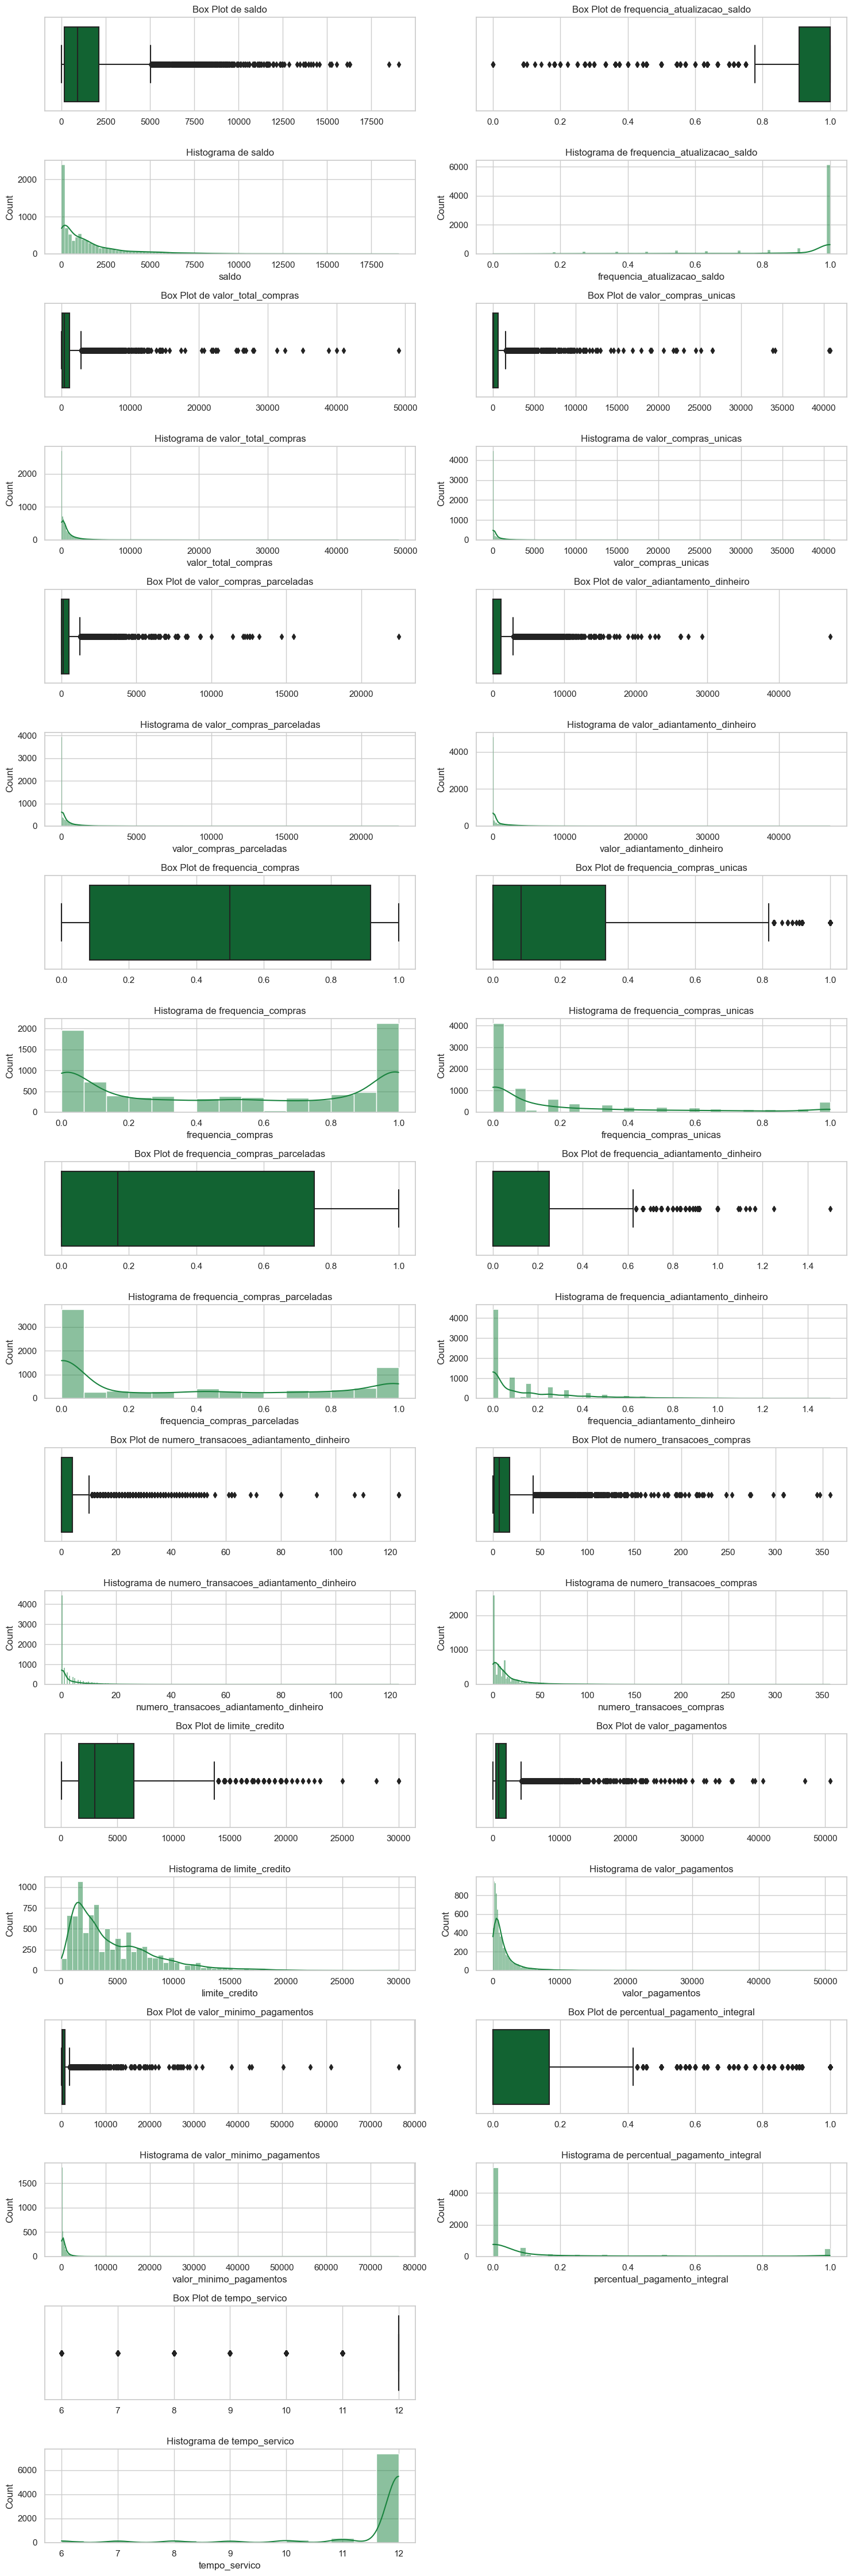

In [10]:
# Definindo a paleta de cores em tons de verde
green_palette_box = sns.color_palette("Greens_r")  # Paleta invertida para boxplots mais claros
green_palette_hist = sns.color_palette("Greens", as_cmap=True)  # Paleta normal para histogramas

# Selecionando as variáveis numéricas já processadas
colunas_numericas = df_numericas.columns

# Número de variáveis quantitativas
num_var = len(colunas_numericas)

# Determinando o número de linhas e colunas
num_cols = 2  # Dois gráficos por linha
num_rows = (num_var + num_cols - 1) // num_cols  # Calcula o número necessário de linhas, arredondado para cima

# Criando a figura e definindo o número de linhas e colunas para os subplots
fig, axes = plt.subplots(nrows=num_rows * 2, ncols=num_cols, figsize=(15, 5 * num_rows))  # Cada variável ocupa duas linhas

# Loop para plotar box plots e histogramas para cada variável numérica
for i, coluna in enumerate(colunas_numericas):
    row = (i // num_cols) * 2  # Encontra a linha base para o par de gráficos (boxplot e histograma)
    col = i % num_cols  # Encontra a coluna para o par de gráficos

    # Box plot na parte superior usando tons de verde
    sns.boxplot(data=df, x=coluna, ax=axes[row, col], orient='h', palette=green_palette_box)
    axes[row, col].set_title(f'Box Plot de {coluna}')
    axes[row, col].set_xlabel('')  # Limpar label de x se não necessário

    # Histograma diretamente abaixo do box plot, também em verde
    sns.histplot(df[coluna], kde=True, ax=axes[row + 1, col], color=green_palette_hist(200))
    axes[row + 1, col].set_title(f'Histograma de {coluna}')

# Removendo subplots vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[(j // num_cols) * 2, j % num_cols])  # Remove o boxplot vazio
    fig.delaxes(axes[((j // num_cols) * 2) + 1, j % num_cols])  # Remove o histograma vazio

# Ajustando o layout para evitar sobreposição e melhorar a apresentação
plt.tight_layout()
plt.show()

---

#### 💡 Observações:

**Análise Gráfica das Variáveis Numéricas**:

- **Saldo Restante na Conta (`saldo`)**:
  - O boxplot mostra uma grande quantidade de outliers acima de **7.500**.
  - A distribuição é assimétrica positiva, com a maioria dos clientes possuindo saldos baixos e poucos com saldos elevados.

- **Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
  - A maior parte dos clientes possui frequência de atualização do saldo próxima de **1**, indicando que os saldos são frequentemente atualizados.
  - O histograma apresenta baixa dispersão, com valores concentrados próximos a **1**.

- **Valor Total de Compras (`valor_total_compras`)**:
  - A distribuição apresenta uma cauda longa, com a maioria dos clientes realizando compras de valores baixos.
  - O boxplot evidencia diversos outliers acima de **10.000**, indicando valores extremos no comportamento de consumo.

- **Valor de Compras Únicas (`valor_compras_unicas`)**:
  - Assim como o valor total de compras, a maioria dos clientes realiza compras únicas de valores baixos.
  - O boxplot destaca valores extremos superiores a **40.000**, indicando poucos casos de compras únicas de alto valor.

- **Valor de Compras Parceladas (`valor_compras_parceladas`)**:
  - A maioria dos valores está concentrada em **zero**, indicando que muitos clientes não realizam compras parceladas.
  - O histograma também reflete a concentração em valores baixos, com uma cauda longa. O boxplot apresenta outliers acima de **5.000**, mas eles são relativamente raros, indicando que compras parceladas altas não são uma característica predominante.

- **Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
  - A distribuição é altamente assimétrica, com a maior parte dos clientes utilizando valores baixos ou nulos de adiantamento.
  - O boxplot revela outliers significativos acima de **10.000**, o que sugere clientes com comportamento atípico de utilização elevada de adiantamentos.

- **Frequência de Compras (`frequencia_compras`)**:
  - A distribuição é bimodal, com muitos clientes apresentando frequências próximas de **0** ou **1**, indicando dois grupos bem distintos: clientes que compram raramente e outros que compram frequentemente.

- **Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - A maior parte dos clientes realiza poucas transações, com um pico próximo de **zero**.
  - Outliers notáveis acima de **50 transações** são observados no boxplot, indicando comportamentos fora do padrão.

- **Limite de Crédito (`limite_credito`)**:
  - A distribuição é assimétrica, com a maioria dos clientes concentrados em limites de até **10.000**.
  - O boxplot evidencia outliers significativos acima de **15.000**, indicando poucos clientes com limites excepcionalmente altos.

- **Valor Mínimo de Pagamentos (`valor_minimo_pagamentos`)**:
  - O histograma mostra uma alta concentração em valores baixos, com uma cauda longa que se estende até valores extremos.
  - Outliers notáveis acima de **50.000** são visíveis no boxplot, o que pode influenciar a análise.

- **Tempo de Serviço (`tempo_servico`)**:
  - Quase todos os clientes estão concentrados em **12 meses**, indicando que essa variável não possui grande variabilidade.
  - O boxplot reflete pouca dispersão, com a maioria dos valores agrupados.

**Conclusão**:
- A presença de **outliers** significativos em variáveis como `saldo`, `valor_total_compras`, e `valor_minimo_pagamentos` deve ser analisada com cuidado para evitar impacto negativo na clusterização.
- Variáveis como `tempo_servico` possuem baixa variabilidade e podem ter menor importância no processo de segmentação.
- Algumas variáveis, como `frequencia_compras`, apresentam padrões bimodais que podem ser importantes para identificar segmentos distintos de clientes.

---

### 5.2 Análise de Correlação <a id="5.2-análise-de-correlação"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, investigaremos a correlação entre as variáveis numéricas do dataset. A análise de correlação nos permite identificar relações lineares entre as variáveis, o que é essencial para:

1. **Identificar Multicolinearidade**: Variáveis altamente correlacionadas podem conter informações redundantes e impactar algoritmos sensíveis à multicolinearidade.
2. **Entender Relações Entre Variáveis**: Detectar dependências ou padrões relevantes no comportamento dos clientes.
3. **Guiar a Seleção de Variáveis**: Focar em variáveis que sejam mais significativas para a segmentação e modelagem.

As etapas incluem:
- **Cálculo da Matriz de Correlação**: Utilizaremos o coeficiente de correlação de Pearson para medir a força e a direção das relações entre as variáveis numéricas.
- **Visualização com Mapa de Calor (Heatmap)**: Representaremos graficamente as correlações para facilitar a identificação de padrões e relações significativas.

Por fim, destacaremos as variáveis mais correlacionadas e discutiremos como essas relações podem influenciar as etapas subsequentes do projeto.

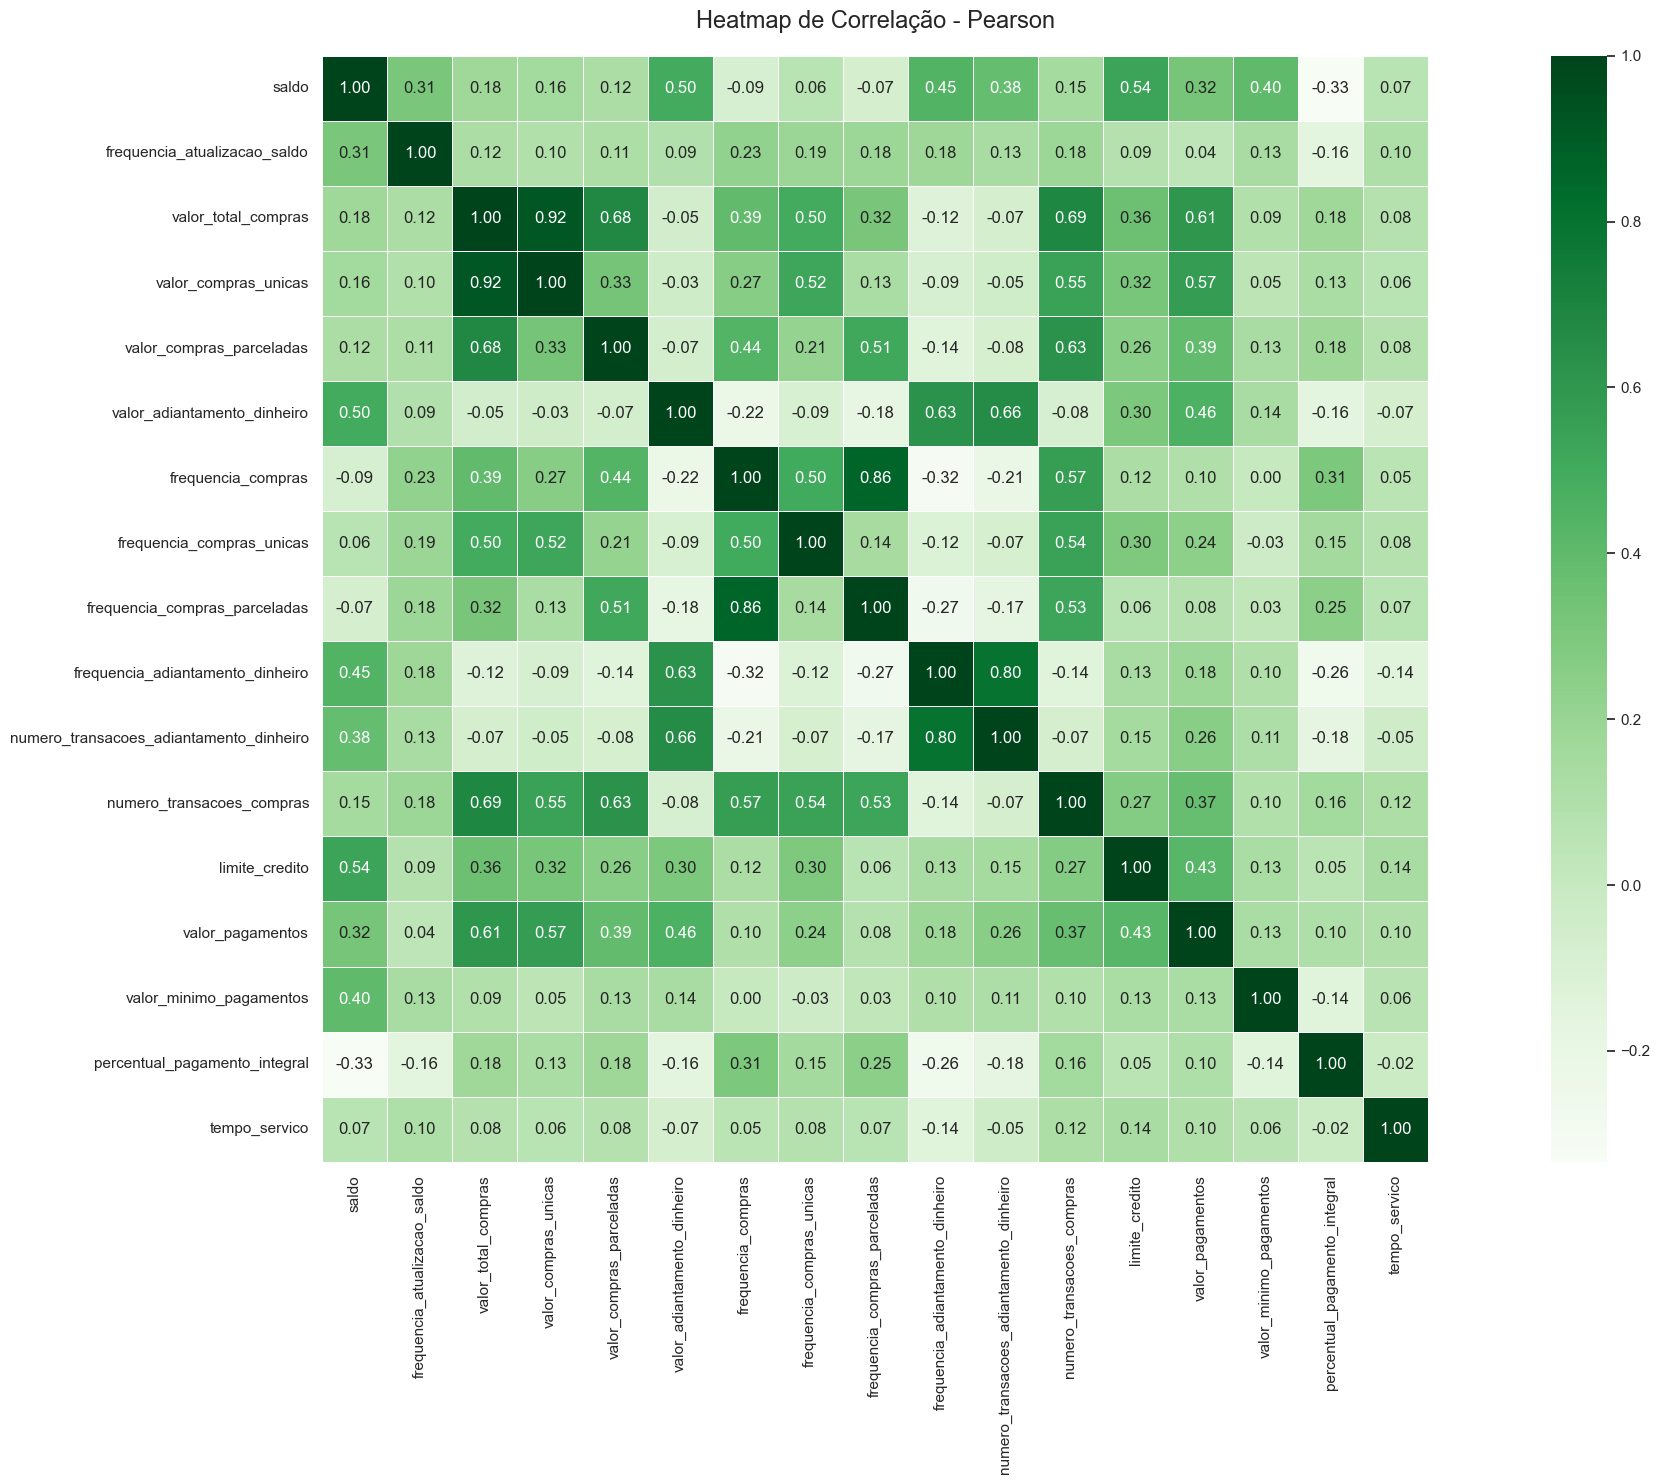

In [11]:
# Calculando a matriz de correlação com Pearson
matriz_correlacao = df_numericas.corr(method='pearson')

# Configurando o tamanho e estilo do gráfico
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

# Criando o heatmap para a matriz de correlação
heatmap = sns.heatmap(
    matriz_correlacao,
    annot=True,  # Exibe os valores no heatmap
    fmt=".2f",  # Formato dos números
    cmap="Greens",  # Paleta de cores para o heatmap
    cbar=True,  # Adiciona barra de cores
    square=True,  # Mantém os quadrados simétricos
    linewidths=0.5,  # Espessura das linhas
)

# Títulos e ajustes
heatmap.set_title('Heatmap de Correlação - Pearson', fontsize=17, pad=20)
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X
plt.yticks(rotation=0)   # Mantém os rótulos do eixo Y na horizontal
plt.tight_layout()
plt.show()

In [12]:
# Definindo o limiar de correlação
limiar_correlacao = 0.6

# Calculando a matriz de correlação e transformando em formato longo
correlacoes_long = matriz_correlacao.unstack().reset_index()
correlacoes_long.columns = ['Variável 1', 'Variável 2', 'Correlação']

# Filtrando apenas as correlações acima do limiar, excluindo diagonais (self-correlation)
correlacoes_filtradas = correlacoes_long[
    (correlacoes_long['Correlação'].abs() >= limiar_correlacao) & 
    (correlacoes_long['Variável 1'] != correlacoes_long['Variável 2'])
]

# Ordenando pela força da correlação
correlacoes_filtradas = correlacoes_filtradas.sort_values(
    by='Correlação', key=lambda x: x.abs(), ascending=False
).reset_index(drop=True)

# Exibindo o DataFrame resultante
correlacoes_filtradas

,Variável 1,Variável 2,Correlação
0,valor_total_compras,valor_compras_unicas,0.916780
1,valor_compras_unicas,valor_total_compras,0.916780
2,frequencia_compras_parceladas,frequencia_compras,0.862338
3,frequencia_compras,frequencia_compras_parceladas,0.862338
4,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,0.799593
5,numero_transacoes_adiantamento_dinheiro,frequencia_adiantamento_dinheiro,0.799593
6,valor_total_compras,numero_transacoes_compras,0.688732
7,numero_transacoes_compras,valor_total_compras,0.688732
8,valor_compras_parceladas,valor_total_compras,0.679259
9,valor_total_compras,valor_compras_parceladas,0.679259


---

#### 💡 Observações:

**Análise de Correlação**:

- **Valor Total de Compras (`valor_total_compras`) e Compras Únicas (`valor_compras_unicas`)**:
  - Correlação de **0.92**, indicando que uma grande parte do valor total de compras é composta por compras únicas.
  - Esse comportamento sugere que muitos clientes preferem realizar transações maiores de forma esporádica, o que pode ser relevante para identificar clientes que priorizam compras específicas de alto valor.

- **Frequência de Compras Parceladas (`frequencia_compras_parceladas`) e Frequência Geral de Compras (`frequencia_compras`)**:
  - Correlação de **0.86**, mostrando que clientes que compram com frequência também realizam mais compras parceladas.
  - Esse padrão pode indicar que clientes com maior atividade financeira utilizam parcelamentos como estratégia de gerenciamento financeiro.

- **Frequência de Adiantamento de Dinheiro (`frequencia_adiantamento_dinheiro`) e Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - Correlação de **0.80**, evidenciando que clientes que utilizam adiantamentos com frequência tendem a realizar mais transações nesse formato.
  - Isso sugere um perfil de cliente que pode estar em maior necessidade financeira ou utilizando adiantamentos como complemento à renda.

- **Valor Total de Compras (`valor_total_compras`) e Número de Transações de Compras (`numero_transacoes_compras`)**:
  - Correlação de **0.69**, indicando que um maior número de transações contribui para um valor total de compras mais alto.
  - Isso não significa que cada transação seja de alto valor, mas sim que clientes ativos em número de compras tendem a gastar mais.

- **Valor de Compras Parceladas (`valor_compras_parceladas`) e Valor Total de Compras (`valor_total_compras`)**:
  - Correlação de **0.68**, destacando a relevância das compras parceladas no total de compras.
  - Esse padrão pode ser explorado com ofertas promocionais para incentivar o uso de parcelamentos.

- **Valor de Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`) com Número e Frequência de Transações de Adiantamento**:
  - Correlações de **0.66** e **0.63**, respectivamente.
  - Clientes que utilizam adiantamentos com frequência geralmente realizam transações maiores, o que pode indicar uma dependência financeira dessa funcionalidade.

- **Valor de Pagamentos (`valor_pagamentos`) e Valor Total de Compras (`valor_total_compras`)**:
  - Correlação de **0.61**, mostrando que clientes que gastam mais também tendem a realizar pagamentos maiores.
  - Isso pode refletir um bom comportamento financeiro, sendo um grupo de interesse para estratégias premium.

---

#### Conclusão:
- As correlações mais fortes ajudam a identificar grupos de clientes com comportamentos financeiros específicos, como:
  - Clientes que preferem compras únicas de alto valor.
  - Clientes que utilizam frequentemente parcelamentos e adiantamentos.
- Esses insights são importantes para direcionar as estratégias de segmentação e definir ofertas personalizadas.
- Algumas variáveis com baixa correlação, como `tempo_servico`, podem ter menor influência no processo de clusterização.

---

### 5.3 Análise de Outliers <a id="5.3-análise-de-outliers"></a>  
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, realizaremos uma análise detalhada dos outliers presentes nas variáveis quantitativas. Outliers são valores que se afastam significativamente da distribuição central dos dados e podem impactar a qualidade da clusterização, dependendo de sua natureza e causa.

As etapas desta análise incluem:

1. **Identificação de Outliers**:  
   Utilizamos o método do **Intervalo Interquartil (IQR)** para identificar valores extremos em cada variável. O IQR é calculado como a diferença entre o 3º quartil (Q3) e o 1º quartil (Q1). Os limites inferior e superior para detecção de outliers são dados por:
   - Limite inferior: \( Q1 - 1.5 \times IQR \)
   - Limite superior: \( Q3 + 1.5 \times IQR \)

2. **Quantificação de Outliers por Variável**:  
   Geramos uma tabela para destacar o número e a proporção de outliers em relação ao total de registros para cada variável quantitativa.

3. **Impacto dos Outliers**:  
   Discutimos as variáveis com maior proporção de outliers, avaliando se esses valores extremos são representativos de comportamentos reais ou se podem distorcer os resultados da clusterização.

In [13]:
# Inicializando um dicionário para armazenar a quantidade de outliers para cada variável
outliers_info = {}

# Calculando os limites e contagem de outliers para cada variável quantitativa
for coluna in df_numericas.columns:
    # Calculando Q1, Q3 e IQR
    Q1 = df_numericas[coluna].quantile(0.25)
    Q3 = df_numericas[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contando os outliers abaixo e acima dos limites
    outliers_abaixo = (df_numericas[coluna] < limite_inferior).sum()
    outliers_acima = (df_numericas[coluna] > limite_superior).sum()
    total_outliers = outliers_abaixo + outliers_acima

    # Armazenando os resultados no dicionário
    outliers_info[coluna] = {
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total de Outliers': total_outliers,
        'Percentual de Outliers (%)': (total_outliers / df_numericas.shape[0]) * 100
    }

# Convertendo o dicionário para um DataFrame para melhor visualização
tabela_outliers = pd.DataFrame(outliers_info).T

# Ordenando a tabela pelo percentual de outliers em ordem decrescente
tabela_outliers = tabela_outliers.sort_values(by='Percentual de Outliers (%)', ascending=False)

# Exibindo a tabela de frequência de outliers
tabela_outliers

,Outliers Abaixo,Outliers Acima,Total de Outliers,Percentual de Outliers (%)
frequencia_atualizacao_saldo,1511.0,0.0,1511.0,17.496526
percentual_pagamento_integral,0.0,1343.0,1343.0,15.551181
tempo_servico,1290.0,0.0,1290.0,14.937471
valor_adiantamento_dinheiro,0.0,977.0,977.0,11.313108
valor_compras_unicas,0.0,961.0,961.0,11.127837
valor_minimo_pagamentos,0.0,841.0,841.0,9.738305
valor_compras_parceladas,0.0,811.0,811.0,9.390922
numero_transacoes_adiantamento_dinheiro,0.0,794.0,794.0,9.194071
valor_pagamentos,0.0,785.0,785.0,9.089856
valor_total_compras,0.0,768.0,768.0,8.893006


In [14]:
# Calculando os limites inferior e superior de outliers para cada variável quantitativa
faixas_outliers = {}

for coluna in df_numericas.columns:
    # Calculando Q1, Q3 e IQR
    Q1 = df_numericas[coluna].quantile(0.25)
    Q3 = df_numericas[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Armazenando os limites e valores estatísticos
    faixas_outliers[coluna] = {
        'Q1': Q1,
        'Q3': Q3,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Mínimo': df_numericas[coluna].min(),
        'Máximo': df_numericas[coluna].max()
    }

# Convertendo o dicionário para DataFrame para visualização
df_faixas_outliers = pd.DataFrame(faixas_outliers).T

# Exibindo a faixa de valores dos outliers
df_faixas_outliers

,Q1,Q3,Limite Inferior,Limite Superior,Mínimo,Máximo
saldo,148.095189,2105.195853,-2787.555807,5040.846849,0.000000,19043.13856
frequencia_atualizacao_saldo,0.909091,1.000000,0.772728,1.136364,0.000000,1.00000
valor_total_compras,43.367500,1145.980000,-1610.551250,2799.898750,0.000000,49039.57000
valor_compras_unicas,0.000000,599.100000,-898.650000,1497.750000,0.000000,40761.25000
valor_compras_parceladas,0.000000,484.147500,-726.221250,1210.368750,0.000000,22500.00000
valor_adiantamento_dinheiro,0.000000,1132.385490,-1698.578235,2830.963725,0.000000,47137.21176
frequencia_compras,0.083333,0.916667,-1.166668,2.166668,0.000000,1.00000
frequencia_compras_unicas,0.000000,0.333333,-0.499999,0.833333,0.000000,1.00000
frequencia_compras_parceladas,0.000000,0.750000,-1.125000,1.875000,0.000000,1.00000
frequencia_adiantamento_dinheiro,0.000000,0.250000,-0.375000,0.625000,0.000000,1.50000


---

#### 💡 **Observações**:

**1. Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
- **Outliers Abaixo**: 17,5% dos registros (1.511 clientes) apresentam frequências significativamente menores que o intervalo normal. Este comportamento pode indicar clientes com baixa movimentação na conta ou irregularidade no uso.
- **Impacto no Negócio**: Esses clientes podem ser menos engajados com o serviço, representando um segmento de baixo uso.

**2. Percentual de Pagamento Integral (`percentual_pagamento_integral`)**:
- **Outliers Acima**: 15,6% dos registros indicam clientes com percentuais muito altos de pagamento integral.
- **Impacto no Negócio**: Esses valores podem ser clientes de menor risco financeiro, pois pagam o saldo total frequentemente. Outliers aqui podem ser positivos.

**3. Tempo de Serviço (`tempo_servico`)**:
- **Outliers Abaixo**: 14,9% dos registros indicam clientes com tempo de serviço inferior ao limite inferior (6 meses).
- **Impacto no Negócio**: Clientes com pouco tempo de serviço podem ser novos e ainda não apresentaram um histórico robusto para análises.

**4. Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
- **Outliers Acima**: 11,3% dos clientes apresentam valores muito elevados de adiantamento de dinheiro.
- **Impacto no Negócio**: Clientes que utilizam frequentemente o adiantamento de dinheiro podem representar maior lucratividade, mas também maior risco.

**5. Compras Únicas (`valor_compras_unicas`)**:
- **Outliers Acima**: 11,1% dos clientes realizam compras únicas de valores consideravelmente elevados.
- **Impacto no Negócio**: Estes clientes podem ser um segmento de alto valor, mas os valores extremos podem influenciar a análise de clusterização.

**6. Compras Parceladas (`valor_compras_parceladas`)**:
- **Outliers Acima**: 9,9% dos clientes realizam compras parceladas de valores extremamente altos.
- **Impacto no Negócio**: Este comportamento sugere um segmento que pode ser mais propenso a financiar compras, relevante para estratégias de crédito.

**7. Limite de Crédito (`limite_credito`)**:
- **Outliers Acima**: Apenas 2,8% dos clientes apresentam limites de crédito extremamente elevados.
- **Impacto no Negócio**: Embora raros, esses clientes podem ser prioritários para estratégias exclusivas, como produtos premium.

**8. Tempo de Serviço (`tempo_servico`)**:
- **Baixa Variabilidade**: Os outliers estão concentrados abaixo de 6 meses, reforçando que poucos clientes possuem um tempo de uso atípico.
- **Impacto no Negócio**: Esse dado pode influenciar pouco na segmentação, pois a maioria dos clientes tem um tempo de serviço homogêneo.

---

#### Discussão:

- **Presença de Outliers Significativos**: As variáveis relacionadas a valores financeiros (`valor_compras_unicas`, `valor_compras_parceladas`, `valor_pagamentos`) e limites de crédito apresentam uma proporção notável de outliers. Esses valores podem ser legítimos e representar comportamentos atípicos mas importantes no negócio.

- **Ação Sobre Outliers**:
  1. **Manter Outliers Positivos**: Variáveis como `valor_compras_unicas` e `percentual_pagamento_integral` podem trazer informações sobre clientes de alto valor e baixo risco.
  2. **Tratar Outliers Negativos**: Valores baixos em `frequencia_atualizacao_saldo` e `tempo_servico` podem indicar perfis desengajados ou novos, requerendo ajustes para não influenciar negativamente os modelos.
  3. **Avaliar Segmentos Específicos**: É possível criar grupos segmentados para clientes com uso elevado de adiantamento e limites de crédito, focando em estratégias personalizadas.

- **Próximos Passos**:
  - Decidir entre remoção, transformação (log ou winsorização) ou manutenção dos outliers com base no impacto observado.
  - Verificar a influência dos outliers nos resultados da clusterização, evitando viés excessivo no agrupamento.

---

---

#### 💡 Decisão Sobre os Outliers:

Com base na análise realizada, decidimos **manter os outliers na base de dados** neste momento, por mais que representem valores extremos. Essa decisão se baseia no seguinte raciocínio:

- **Contexto de Negócio**:
  - Os outliers podem refletir comportamentos específicos de segmentos importantes de clientes, como clientes de alto valor ou clientes com uso atípico do cartão de crédito.
  - Removê-los neste estágio poderia comprometer a interpretação dos clusters e a identificação de padrões de comportamento relevantes.

- **Próximos Passos**:
  - Verificar o impacto dos outliers nos resultados ao rodar os estimadores de clusterização.
  - Caso os outliers prejudiquem a formação ou interpretação dos clusters, retornaremos a esta etapa para realizar transformações ou exclusões específicas.

Esta abordagem mantém os dados o mais completo possível, permitindo uma análise inicial mais abrangente.

---

### 5.4 Conclusões da EDA <a id="5.4-conclusões-da-eda"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

---

Após realizar a Análise Exploratória de Dados (EDA), chegamos às seguintes conclusões e constatações relevantes para o projeto:

#### 💡 Características Gerais das Variáveis:

1. **Natureza Predominantemente Numérica**:
   - A maior parte das variáveis no dataset é quantitativa e está relacionada a comportamentos financeiros dos clientes, como gastos, pagamentos e limites de crédito. Isso reforça a importância de entender a distribuição e as relações entre essas variáveis para segmentar adequadamente os clientes.

2. **Presença de Outliers**:
   - Diversas variáveis apresentam outliers significativos, como `valor_total_compras`, `valor_adiantamento_dinheiro` e `limite_credito`. Esses outliers podem representar comportamentos específicos de clientes, como usuários de alto gasto ou uso atípico do cartão. Optamos por mantê-los para preservar a integridade do comportamento real dos clientes.

3. **Distribuição Assimétrica**:
   - Variáveis como `saldo` e `valor_pagamentos` têm distribuições assimétricas positivas, o que indica que a maioria dos clientes possui valores baixos, enquanto poucos têm valores muito altos. Essa característica será importante ao identificar clusters de clientes diferenciados.

#### 💡 Relações Entre Variáveis:

4. **Alta Correlação em Variáveis de Compras**:
   - As variáveis `valor_total_compras`, `valor_compras_unicas` e `valor_compras_parceladas` apresentam correlações muito altas entre si, indicando que essas medidas estão fortemente relacionadas e capturam comportamentos semelhantes.

5. **Uso de Adiantamentos**:
   - Há uma forte relação entre `frequencia_adiantamento_dinheiro` e `numero_transacoes_adiantamento_dinheiro`, bem como com `valor_adiantamento_dinheiro`. Isso sugere que clientes que realizam transações frequentes de adiantamento tendem a movimentar valores altos. Esse comportamento pode identificar clientes em situações financeiras mais críticas ou com padrões de uso específicos.

6. **Comportamentos de Pagamento**:
   - Variáveis como `valor_minimo_pagamentos` e `percentual_pagamento_integral` destacam comportamentos financeiros distintos, como clientes que realizam pagamentos mínimos ou integram totalmente suas dívidas.

#### 💡 Implicações para o Negócio:

7. **Segmentação Relevante**:
   - As diferenças claras nos padrões de compras, pagamentos e limites de crédito indicam que existem grupos de clientes com comportamentos bem distintos. Esses padrões podem ser explorados na próxima etapa de clusterização para criar segmentos que permitam estratégias de marketing direcionadas.

8. **Uso Estratégico dos Outliers**:
   - Apesar de serem valores extremos, os outliers podem representar clientes de alto valor ou comportamentos atípicos que merecem atenção especial. Por isso, manteremos esses dados na análise inicial.

9. **Variáveis Potencialmente Redundantes**:
   - As altas correlações observadas entre algumas variáveis, como as relacionadas a compras, podem indicar redundância. Esse fator será avaliado durante a clusterização para evitar sobreposição de informações.

---

Estas conclusões fundamentam a próxima etapa do projeto, que será focada na segmentação dos clientes por meio de algoritmos de clusterização. A análise conduzida até aqui fornece uma base sólida para entender as características e comportamentos que definirão os clusters.

## 6. Análise de Segmentação (Clusterização) 🔍 <a id="6-análise-de-segmentação-clusterização"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos a análise de segmentação dos clientes utilizando técnicas de clusterização. O objetivo é identificar grupos distintos de clientes com características e comportamentos semelhantes, fornecendo insights valiosos para personalização de estratégias de marketing e melhorias no relacionamento com os clientes.

### [6.1 Contexto e Objetivo da Segmentação](#6.1-contexto-e-objetivo-da-segmentação)
Definimos o objetivo principal da clusterização, explicando como a segmentação dos clientes pode ser usada para gerar valor ao negócio. Exploramos como os clusters podem destacar padrões de comportamento, como uso de crédito, adiantamentos e frequência de compras.

### [6.2 Pré-Processamento para Clusterização](#6.2-pré-processamento-para-clusterização)
Preparamos os dados para a clusterização, garantindo que estejam normalizados e otimizados para os algoritmos. Removemos variáveis redundantes, verificamos alta correlação e consideramos a aplicação de redução de dimensionalidade, como PCA.

### [6.3 Determinação do Número de Clusters](#6.3-determinação-do-número-de-clusters)
Utilizamos métricas e métodos como o Elbow Method, Silhouette Score e Calinski-Harabasz Index para determinar o número ideal de clusters, justificando nossa escolha com base em visualizações e valores obtidos.

### [6.4 Aplicação de Algoritmos de Clusterização](#6.4-aplicação-de-algoritmos-de-clusterização)
Aplicamos diferentes algoritmos de clusterização, como K-Means, Hierarchical Clustering e DBSCAN, para identificar padrões distintos e avaliar a melhor abordagem para o problema.

### [6.5 Comparação de Modelos de Clusterização](#6.5-comparação-de-modelos-de-clusterização)
Comparamos os algoritmos de clusterização usando métricas como Silhouette Score, Davies-Bouldin Index e Calinski-Harabasz Index. Criamos uma tabela comparativa para identificar o modelo com melhor desempenho.

### [6.6 Interpretação dos Clusters](#6.6-interpretação-dos-clusters)
Interpretamos os clusters gerados, descrevendo o perfil de cada grupo com base em variáveis-chave. Utilizamos visualizações como gráficos de barras e boxplots para destacar as características mais relevantes de cada segmento.

### [6.7 Discussão e Estratégias de Negócio](#6.7-discussão-e-estratégias-de-negócio)
Discutimos os insights obtidos com os clusters e propomos estratégias práticas para o negócio, como campanhas de marketing direcionadas e ações de retenção. Avaliamos a necessidade de ajustes nos clusters ou aprofundamento em etapas futuras.

### 6.1 Contexto e Objetivo da Segmentação <a id="6.1-contexto-e-objetivo-da-segmentação"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta seção, apresentamos o contexto do negócio e os objetivos gerais da clusterização no dataset de clientes de cartão de crédito. A clusterização será aplicada para identificar padrões de comportamento entre os clientes, ajudando a personalizar estratégias de marketing e melhorar o atendimento ao cliente.

#### Contexto do Negócio:
O mercado de cartões de crédito é altamente competitivo, e compreender o comportamento dos clientes é essencial para a retenção e engajamento. Segmentar os clientes com base em seu comportamento permite:
- **Personalizar campanhas de marketing**: Oferecer produtos ou benefícios alinhados às necessidades de cada grupo.
- **Aumentar a satisfação do cliente**: Adaptar as estratégias para atender às expectativas de cada segmento.
- **Otimizar recursos**: Direcionar investimentos em marketing para os grupos mais promissores.

#### Objetivo Geral:
O objetivo da clusterização neste projeto é identificar grupos de clientes com padrões semelhantes de comportamento financeiro e de consumo. Esses grupos podem ser usados para:
- **Criar campanhas direcionadas** com base em características como frequência de compras, uso de parcelamento ou adiantamentos.
- **Propor estratégias de retenção** para clientes com maior risco de desengajamento.
- **Descobrir padrões inusitados** que possam sugerir novos nichos de mercado.

#### Expectativas Generalistas:
A análise exploratória realizada no item anterior indicou alguns comportamentos que podem ser investigados na clusterização:
- Grupos com alta frequência de compras e limite elevado de crédito.
- Clientes que utilizam adiantamentos de forma intensa e frequente.
- Clientes que realizam apenas o pagamento mínimo e possuem valores altos de saldo.

Essas são apenas hipóteses iniciais, e o processo de clusterização será exploratório. A interpretação dos clusters encontrados será fundamental para determinar estratégias específicas alinhadas ao negócio.

---


### 6.2 Pré-Processamento para Clusterização 🔄 <a id="6.2-pré-processamento-para-clusterização"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, realizamos o pré-processamento dos dados para garantir que estejam adequados para a aplicação dos algoritmos de clusterização. Como os algoritmos utilizam medidas de distância para segmentar os dados, é essencial que todas as variáveis sejam tratadas de forma uniforme.

As etapas de pré-processamento incluem:

1. **Seleção de Variáveis Relevantes**:
   - Com base na análise exploratória, escolhemos variáveis que representem o comportamento dos clientes, evitando redundâncias ou alta correlação.

2. **Normalização ou Padronização**:
   - As variáveis quantitativas são escaladas para que possuam a mesma unidade de comparação, garantindo que nenhuma variável domine o processo de clusterização.

3. **Remoção de Variáveis Redundantes (se necessário)**:
   - Caso sejam identificadas variáveis altamente correlacionadas, uma delas será removida para evitar viés na formação dos clusters.

O pré-processamento é uma etapa essencial para maximizar a eficácia dos algoritmos de clusterização e garantir resultados interpretáveis e úteis para o negócio.

In [15]:
# --------------------------------------------------------------
# Etapa 1: Seleção de Variáveis Importantes para a Clusterização

# Excluindo as colunas não relevantes para a clusterização
# Justificativa:
# - 'id_cliente': Identificador único que não contribui para a análise comportamental.
# - 'valor_pagamentos': Altamente correlacionada com 'valor_total_compras', pode trazer redundância.
# - 'valor_minimo_pagamentos': Redundante, pois 'percentual_pagamento_integral' já reflete o comportamento de pagamento.

# Criando um novo DataFrame apenas com as colunas selecionadas
variaveis_clusterizacao = df.drop(columns=['id_cliente', 'valor_pagamentos', 'valor_minimo_pagamentos'])

# Verificando as dimensões e as colunas do DataFrame resultante
print("Dimensões do DataFrame após a seleção de variáveis:", variaveis_clusterizacao.shape)
print("Colunas selecionadas para clusterização:", list(variaveis_clusterizacao.columns))

# Exibindo as 5 primeiras linhas do DataFrame para garantir que a seleção foi realizada corretamente
variaveis_clusterizacao.head()

Dimensões do DataFrame após a seleção de variáveis: (8636, 15)
Colunas selecionadas para clusterização: ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas', 'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 'percentual_pagamento_integral', 'tempo_servico']


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,percentual_pagamento_integral,tempo_servico
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,0.000000,12


In [30]:
# ----------------------------------------
# Etapa 2: Normalização dos Dados
# ----------------------------------------

# Justificativa:
# - Normalizar os dados é essencial para garantir que todas as variáveis tenham peso igual no processo de clusterização.
# - Variáveis com magnitudes muito diferentes (ex.: 'saldo' e 'frequencia_compras') podem distorcer os resultados.

# Inicializando o StandardScaler para padronizar os dados
scaler = StandardScaler()

# Aplicando a normalização apenas às variáveis numéricas selecionadas
dados_normalizados = scaler.fit_transform(variaveis_clusterizacao)

# Convertendo o resultado de volta para um DataFrame com as mesmas colunas originais
df_normalizado = pd.DataFrame(dados_normalizados, columns=variaveis_clusterizacao.columns)

# Verificando as primeiras linhas do DataFrame normalizado
print("Primeiras linhas do DataFrame após normalização:")
df_normalizado.head()

# Verificando as estatísticas descritivas para confirmar a normalização (média próxima de 0 e desvio padrão próximo de 1)
print("Estatísticas descritivas após normalização:")
df_normalizado.describe()

Primeiras linhas do DataFrame após normalização:
Estatísticas descritivas após normalização:


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,percentual_pagamento_integral,tempo_servico,Cluster
count,8636.000000,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,0.000000,-3.422716e-16,1.151876e-17,-3.291073e-17,-2.797412e-17,-4.278395e-17,6.582147e-18,-3.291073e-18,8.227683e-18,2.468305e-17,2.715136e-17,-1.151876e-17,1.118965e-16,5.923932e-17,9.215005e-17,1.974644e-17
std,1.000058,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-0.764144,-4.309583e+00,-4.732082e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-5.377269e-01,-4.221800e+00,-1.976322e+00
25%,-0.693469,6.767893e-02,-4.531953e-01,-3.591603e-01,-4.588390e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-5.377269e-01,3.551807e-01,-4.502564e-01
50%,-0.326598,5.054046e-01,-2.999696e-01,-3.324445e-01,-3.554965e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-5.377269e-01,3.551807e-01,-4.502564e-01
75%,0.240507,5.054046e-01,5.562856e-02,-3.444604e-03,6.901931e-02,6.515234e-02,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,2.485496e-02,3.551807e-01,1.075809e+00
max,8.323708,5.054046e-01,2.215714e+01,2.384284e+01,2.407255e+01,2.175188e+01,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,2.837758e+00,3.551807e-01,1.075809e+00


#### Etapa 3
[Voltar ao Pré-Processamento](#6.2-pré-processamento-para-clusterização)

Nesta etapa, avaliamos a necessidade de remover variáveis altamente correlacionadas para evitar viés na formação dos clusters. No entanto, com base na análise exploratória e nas discussões anteriores, decidimos **manter todas as variáveis** selecionadas na etapa 6.2.1, mesmo que algumas apresentem correlação, devido aos seguintes motivos:

1. **Contexto do Negócio**:
   - Variáveis correlacionadas, como `valor_compras_unicas` e `valor_total_compras`, refletem comportamentos distintos que podem ser cruciais para identificar padrões de consumo.
   - Outras variáveis, como `tempo_servico`, mesmo com baixa variabilidade, podem ser relevantes em estratégias de retenção de clientes.

2. **Potencial Impacto na Clusterização**:
   - Decidimos manter essas variáveis para preservar informações que possam diferenciar clusters relevantes.
   - Caso os clusters gerados apresentem inconsistências ou pouca separação, podemos revisar essa decisão e aplicar técnicas como PCA ou remoção de variáveis redundantes.

> **Nota**: A decisão de manter variáveis correlacionadas será monitorada nas etapas seguintes. Se necessário, revisitaremos essa etapa para ajustar o conjunto de variáveis de acordo com os resultados obtidos.

Essa abordagem garante que não perderemos informações importantes logo no início do processo, permitindo uma análise mais abrangente do comportamento dos clientes.


---

#### 💡 Observações:

- **Seleção de Variáveis**:
  - Excluímos variáveis como `id_cliente` (não relevante para clusterização), `valor_pagamentos` e `valor_minimo_pagamentos` (por redundância com outras variáveis mais representativas).
  - Mantivemos variáveis como `tempo_servico` e `valor_compras_unicas`, considerando seu contexto de negócio e potencial impacto na clusterização.

- **Normalização**:
  - Todas as variáveis quantitativas foram padronizadas com média 0 e desvio padrão 1, garantindo igualdade no impacto das variáveis durante a clusterização.

- **Remoção de Variáveis Redundantes**:
  - Após discussões baseadas no contexto de negócio, decidimos manter variáveis correlacionadas, pois representam comportamentos distintos relevantes para segmentação.
  - Monitoraremos os resultados da clusterização para avaliar se essa decisão precisa ser revisitada.

> **Próximos Passos**:
- Continuar com a definição do número de clusters, considerando diferentes métricas de avaliação (Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index).
- Implementar os algoritmos de clusterização com base nos dados pré-processados.

---

### 6.3 Determinação do Número de Clusters 📊 <a id="6.3-determinação-do-número-de-clusters"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, determinamos o número ideal de clusters para a segmentação dos clientes. Isso é feito utilizando diferentes métodos e métricas que ajudam a identificar o melhor valor de \( k \), ou seja, a quantidade de agrupamentos que representam os dados de forma eficiente e significativa.

As abordagens adotadas incluem:

1. **Método do Cotovelo (Elbow Method)**:
   - Avalia a variação da soma total dos erros quadrados (inércia) para diferentes valores de \( k \).
   - O ponto em que a redução da inércia começa a diminuir significativamente (o "cotovelo") sugere o número ideal de clusters.

2. **Silhouette Score**:
   - Mede a coesão e separação dos clusters.
   - Valores próximos de 1 indicam que os clusters estão bem definidos.

3. **Índice Calinski-Harabasz**:
   - Mede a densidade e separação dos clusters.
   - Um índice maior indica uma melhor configuração de clusters.

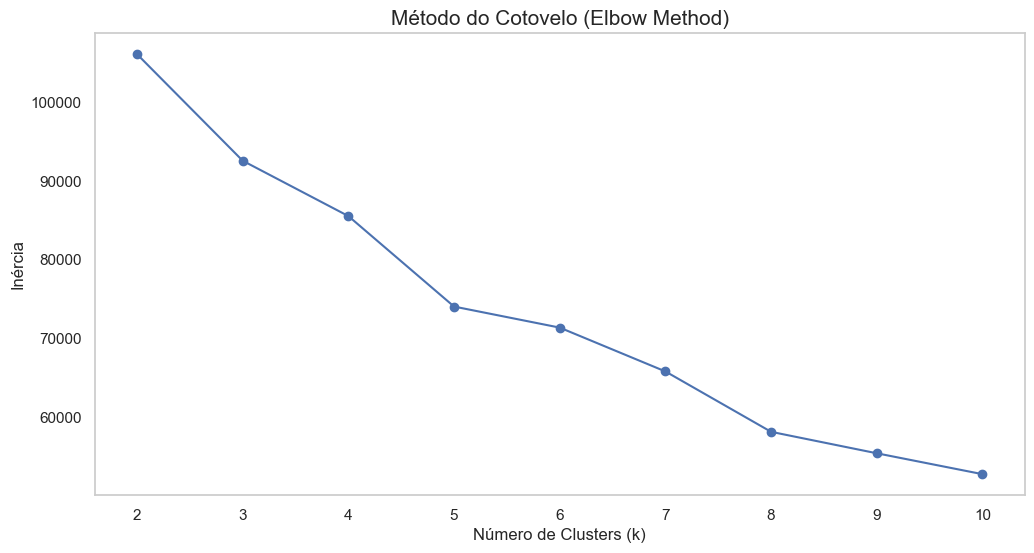

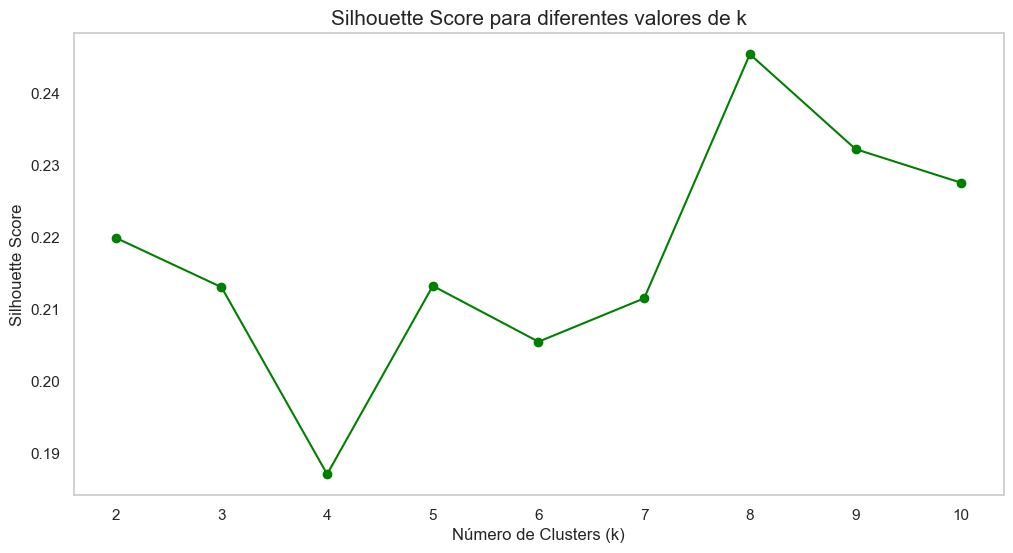

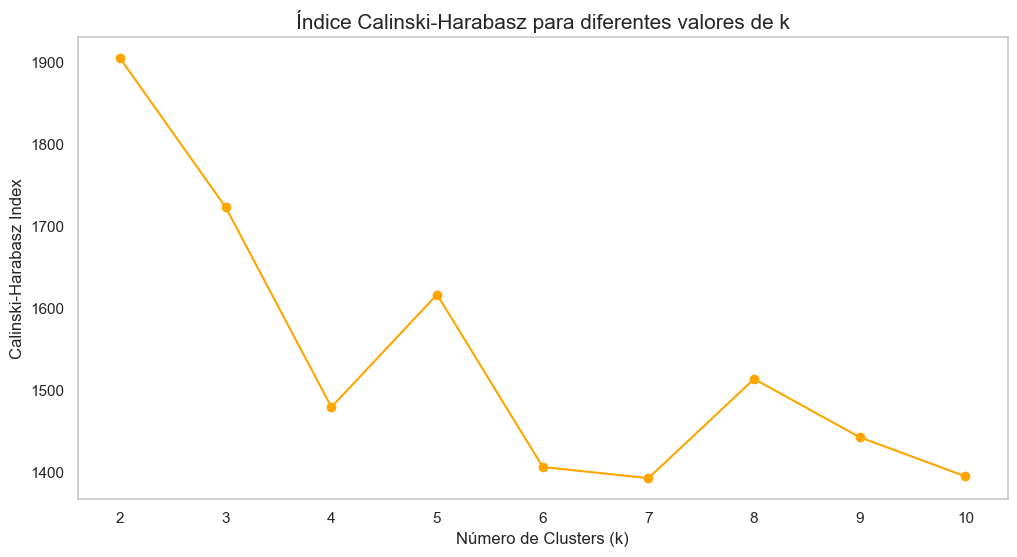

In [19]:
# Lista para armazenar as métricas para diferentes números de clusters
inercia = []  # Soma dos erros quadrados
silhouette_scores = []  # Silhouette Score
calinski_harabasz_scores = []  # Calinski-Harabasz Index

# Definindo os possíveis valores de k (número de clusters)
range_clusters = range(2, 11)  # De 2 a 10 clusters

# Loop para calcular as métricas para cada valor de k
for k in range_clusters:
    # Inicializando o modelo K-Means com o número atual de clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajustando o modelo aos dados normalizados
    kmeans.fit(df_normalizado)
    
    # Calculando a inércia (soma dos erros quadrados)
    inercia.append(kmeans.inertia_)
    
    # Calculando o Silhouette Score
    silhouette_avg = silhouette_score(df_normalizado, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculando o Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(df_normalizado, kmeans.labels_)
    calinski_harabasz_scores.append(ch_score)

# Plotando o Método do Cotovelo (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, inercia, marker='o')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.grid()
plt.show()

# Plotando o Silhouette Score para diferentes k
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score para diferentes valores de k', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid()
plt.show()

# Plotando o Calinski-Harabasz Index para diferentes k
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, calinski_harabasz_scores, marker='o', color='orange')
plt.title('Índice Calinski-Harabasz para diferentes valores de k', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.grid()
plt.show()

---

#### 💡 Observações:

**Análise do Método do Cotovelo (Elbow Method):**
- O gráfico mostra uma diminuição significativa na inércia até aproximadamente **k=5**.
- Após **k=5**, a redução na inércia se torna menos acentuada, formando o "cotovelo". Isso sugere que **5 clusters** podem ser uma boa escolha inicial para análise.

**Análise do Silhouette Score:**
- O Silhouette Score apresenta seu maior valor em **k=8**, indicando boa coesão e separação para este número de clusters.
- Contudo, há um valor intermediário relevante em **k=5**, o que mantém este número como uma possibilidade.

**Análise do Índice Calinski-Harabasz:**
- O índice é mais elevado em **k=2**, mas também possui valores consideráveis em **k=5**.
- O comportamento descendente do índice sugere que clusters adicionais além de **k=5** podem reduzir a densidade dentro dos grupos.

**Conclusão:**
- Com base no Elbow Method e no índice Calinski-Harabasz, **k=5** é uma escolha sólida para iniciar a clusterização.
- O Silhouette Score, por outro lado, sugere que **k=8** também merece consideração, principalmente se houver interesse em identificar clusters mais segmentados.

> **Próximos Passos**:
1. Aplicar o algoritmo K-Means com **k=5** e **k=8** para comparar os resultados.
2. Interpretar os clusters gerados e avaliar se fazem sentido no contexto do negócio.
3. Escolher o número final de clusters com base na qualidade dos agrupamentos e insights obtidos.

---

### 6.4 Aplicação de Algoritmos de Clusterização 🔄 <a id="6.4-aplicação-de-algoritmos-de-clusterização"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, aplicamos diferentes algoritmos de clusterização para segmentar os clientes e observar padrões iniciais nos dados. Antes da aplicação dos algoritmos, realizamos uma análise visual com **pairplot** para identificar possíveis padrões e interações entre as variáveis normalizadas.

#### Etapas da Aplicação:

1. **Visualização com Pairplot**:
   - Exploramos as interações entre as variáveis após a normalização.
   - A análise visual ajuda a identificar tendências e validar a separação inicial entre possíveis grupos.

2. **K-Means**:
   - Algoritmo baseado na minimização da inércia, ideal para obter clusters globais e balanceados.
   - Utilizado como baseline para identificar o comportamento dos clusters.

3. **Hierarchical Clustering**:
   - Algoritmo hierárquico para formação de clusters, ideal para analisar a proximidade entre grupos e identificar subgrupos.

4. **DBSCAN**:
   - Algoritmo baseado em densidade, aplicado para identificar clusters em formatos não lineares e tratar ruídos nos dados.

Após a aplicação de cada algoritmo, geramos visualizações básicas para validar os agrupamentos, como gráficos de dispersão em duas dimensões com redução de dimensionalidade (caso necessário).

---

Gerando pairplot para análise visual com um subconjunto de variáveis...


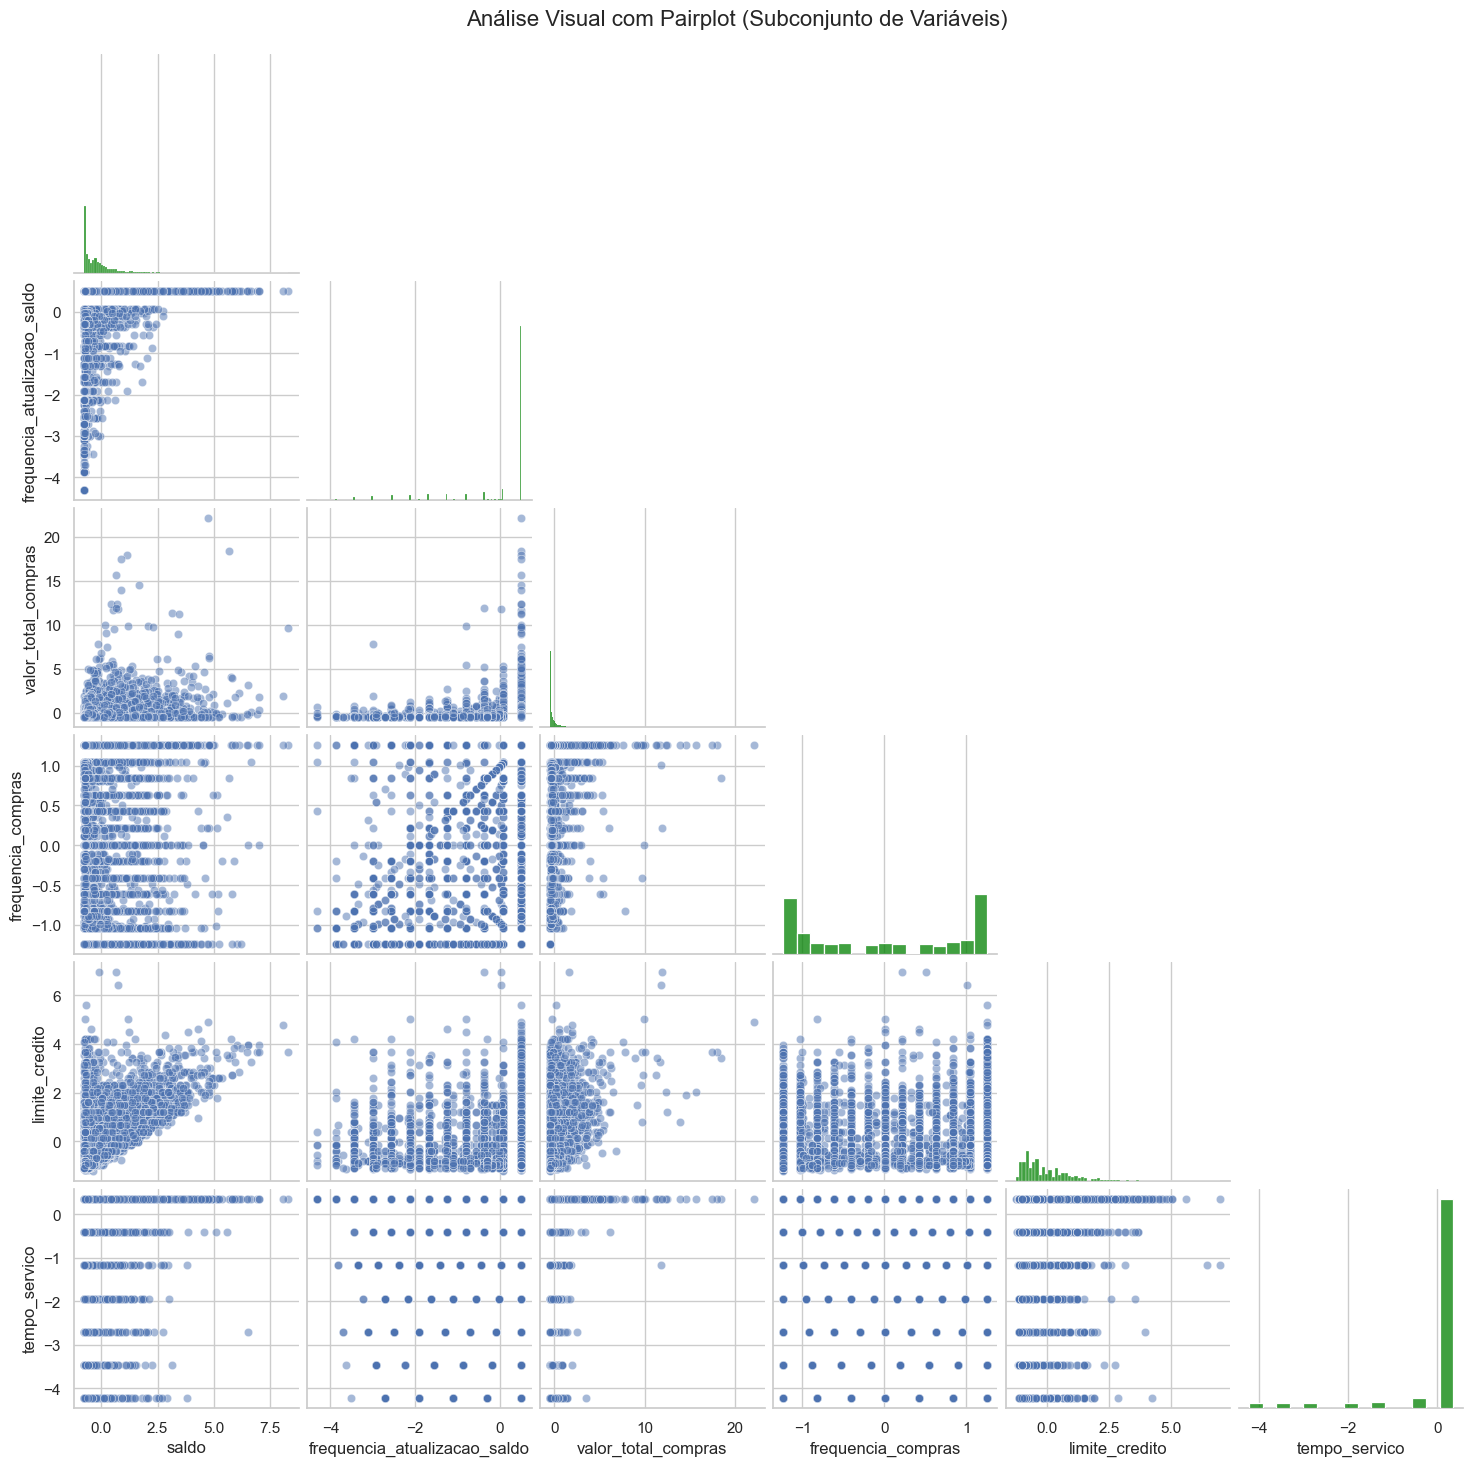

In [29]:
# ----------------------------------------
# Etapa 1: Análise Visual com Pairplot
# ----------------------------------------

# Justificativa:
# - Para evitar problemas de desempenho sem comprometer a representatividade dos dados,
#   reduzimos o número de variáveis exibidas no pairplot.
# - As variáveis foram escolhidas com base em relevância para o negócio e diversidade de comportamento.

# Selecionando um subconjunto de variáveis para visualização
variaveis_pairplot = ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 
                      'frequencia_compras', 'limite_credito', 'tempo_servico']

# Gerando o pairplot
print("Gerando pairplot para análise visual com um subconjunto de variáveis...")
pairplot_fig = sns.pairplot(
    data=df_normalizado[variaveis_pairplot],  # Subconjunto de variáveis selecionadas
    kind="scatter",
    corner=True,
    plot_kws={'alpha': 0.5},  # Transparência para melhorar a visualização
    diag_kws={'color': 'green'}  # Cor personalizada para os histogramas nas diagonais
)

# Ajustando layout para evitar sobreposição de elementos
pairplot_fig.fig.subplots_adjust(top=0.95)
pairplot_fig.fig.suptitle("Análise Visual com Pairplot (Subconjunto de Variáveis)", fontsize=16)

# Exibindo o gráfico
plt.show()

# Nota:
# - Escolhemos 6 variáveis representativas para garantir clareza na visualização.
# - A abordagem mantém a integridade dos dados, mas reduz a complexidade visual do pairplot.

### 💡 Observações Focadas na Clusterização

#### **1. Saldo (`saldo`)**:
- O alto grau de dispersão do saldo indica que esta variável pode desempenhar um papel importante na separação dos clusters. 
- A relação evidente com `limite_credito` sugere que esses atributos juntos podem formar clusters que diferenciam clientes com altos e baixos saldos disponíveis.

#### **2. Frequência de Atualização de Saldo (`frequencia_atualizacao_saldo`)**:
- A concentração nos valores máximos de frequência pode dificultar a separação de clusters com base nesta variável. 
- No entanto, ela pode ser útil para distinguir clientes com comportamento consistente em atualização do saldo.

#### **3. Valor Total de Compras (`valor_total_compras`)**:
- A correlação com `saldo` e `limite_credito` indica que esta variável ajudará a separar clientes de alto consumo daqueles com comportamento financeiro mais conservador.
- Outliers nos valores mais altos podem impactar algoritmos sensíveis, como K-Means, mas podem ser capturados por DBSCAN ou Hierarchical Clustering.

#### **4. Frequência de Compras (`frequencia_compras`)**:
- A distribuição bimodal sugere dois grandes grupos de clientes: os que compram frequentemente e os que quase não utilizam o cartão.
- Esta variável é crucial para identificar clusters baseados em comportamento transacional.

#### **5. Limite de Crédito (`limite_credito`)**:
- A forte correlação com `saldo` confirma sua relevância na formação de clusters baseados em perfil financeiro.
- Apesar disso, sua interação limitada com variáveis como `frequencia_compras` indica que pode ser mais útil em clusters que diferenciem a capacidade financeira.

#### **6. Tempo de Serviço (`tempo_servico`)**:
- A baixa variabilidade pode limitar sua capacidade de contribuir para a separação de clusters.
- Contudo, ela pode ser relevante em combinação com outras variáveis para identificar clusters relacionados à fidelidade ou ao tempo de relacionamento com a instituição.

---

### **Implicações para a Clusterização**:
- **K-Means**:
  - Pode capturar bem os padrões observados, mas a presença de outliers em `valor_total_compras` e `saldo` pode impactar os resultados.
- **Hierarchical Clustering**:
  - Pode ser útil para explorar a hierarquia de clientes com base em atributos correlacionados, como `saldo` e `limite_credito`.
- **DBSCAN**:
  - Ideal para detectar outliers e capturar clientes com comportamento atípico, como aqueles com valores extremos de `valor_total_compras`.

A análise visual sugere que as variáveis escolhidas têm potencial para segmentar os clientes de forma significativa, fornecendo suporte para a próxima etapa de aplicação de algoritmos.


Distribuição de clientes por cluster:
4    3097
2    2961
3    1219
0     958
1     401
Name: Cluster, dtype: int64


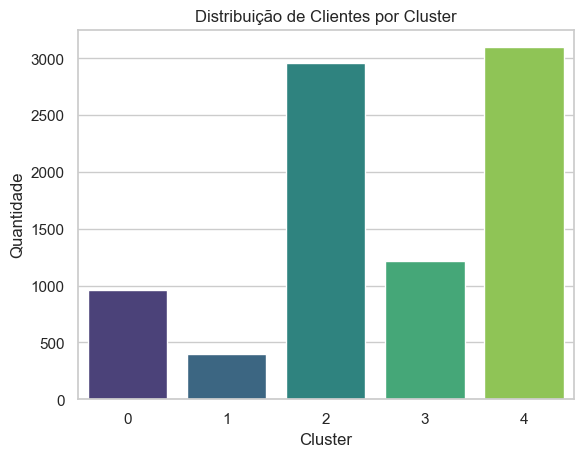

In [23]:
# Etapa 2: Aplicação Inicial do K-Means com k = 5

# Justificativa:
# - Escolhemos k = 5 com base na análise do Elbow Method e Silhouette Score.
# - Inicialmente, optamos por não aplicar PCA para manter a interpretabilidade das variáveis originais.

# 1. Definindo o número de clusters
numero_clusters = 5  # O número ideal de clusters, determinado na etapa anterior

# 2. Inicializando o modelo K-Means
# - n_clusters: Define o número de clusters.
# - random_state: Garante reprodutibilidade dos resultados.
kmeans = KMeans(n_clusters=numero_clusters, random_state=42)

# 3. Ajustando o modelo aos dados normalizados
# - O modelo será treinado para identificar os grupos no conjunto de dados normalizados.
kmeans.fit(df_normalizado)

# 4. Adicionando os rótulos dos clusters ao DataFrame original
# - A coluna 'Cluster' indica a qual grupo cada cliente pertence.
variaveis_clusterizacao['Cluster'] = kmeans.labels_

# 5. Exibindo a contagem de clientes por cluster
# - Verificamos a quantidade de clientes em cada cluster para entender a distribuição.
print("Distribuição de clientes por cluster:")
print(variaveis_clusterizacao['Cluster'].value_counts())

# 6. Visualização inicial dos clusters
# - Um gráfico de barras ajuda a visualizar a quantidade de clientes em cada grupo.
sns.countplot(data=variaveis_clusterizacao, x='Cluster', palette='viridis')
plt.title('Distribuição de Clientes por Cluster')  # Título do gráfico
plt.xlabel('Cluster')  # Rótulo do eixo X
plt.ylabel('Quantidade')  # Rótulo do eixo Y
plt.show()

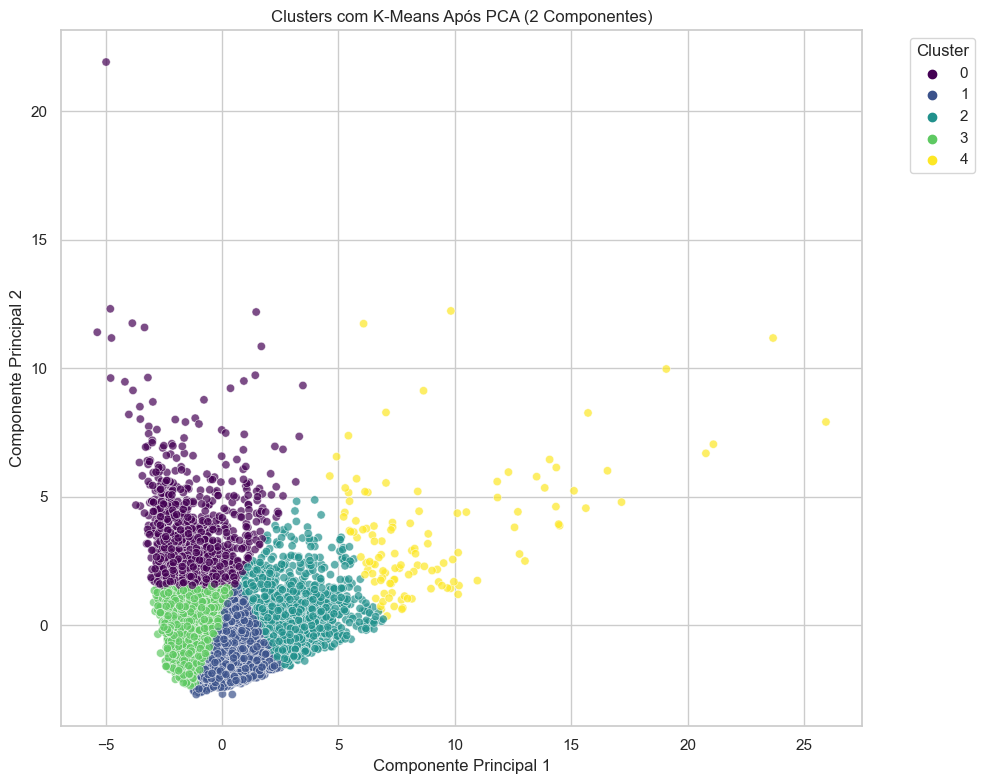

In [24]:
# Etapa 2: Aplicação do PCA Antes do K-Means

# Justificativa:
# - O PCA é usado para reduzir a dimensionalidade dos dados, tornando mais eficiente o processo de clusterização.
# - Usamos 2 componentes principais para facilitar a visualização dos clusters em um espaço bidimensional.

# 1. Reduzindo a dimensionalidade para 2 componentes principais
# - O PCA identifica combinações lineares das variáveis originais que explicam a maior parte da variância nos dados.
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(df_normalizado)

# 2. Aplicando o K-Means nos dados reduzidos
# - Com os dados já reduzidos a duas dimensões, aplicamos o K-Means para encontrar clusters.
kmeans_pca = KMeans(n_clusters=numero_clusters, random_state=42)
kmeans_pca.fit(dados_pca)

# 3. Criando um DataFrame com as componentes principais e os clusters
# - As colunas 'Componente 1' e 'Componente 2' representam os dados reduzidos.
# - A coluna 'Cluster' indica a qual grupo cada ponto pertence.
df_pca = pd.DataFrame(data=dados_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = kmeans_pca.labels_

# 4. Visualizando os clusters em 2D
# - Um gráfico de dispersão permite identificar visualmente a separação dos clusters.
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', data=df_pca, alpha=0.7
)
plt.title('Clusters com K-Means Após PCA (2 Componentes)')  # Título do gráfico
plt.xlabel('Componente Principal 1')  # Rótulo do eixo X
plt.ylabel('Componente Principal 2')  # Rótulo do eixo Y
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda
plt.tight_layout()
plt.show()


Top 5 Configurações:
   n_clusters  n_init  max_iter  silhouette_score
4           8      10       300          0.245466
5           8      10       500          0.245466
6           8      20       300          0.245466
7           8      20       500          0.245466
0           5      10       300          0.213335


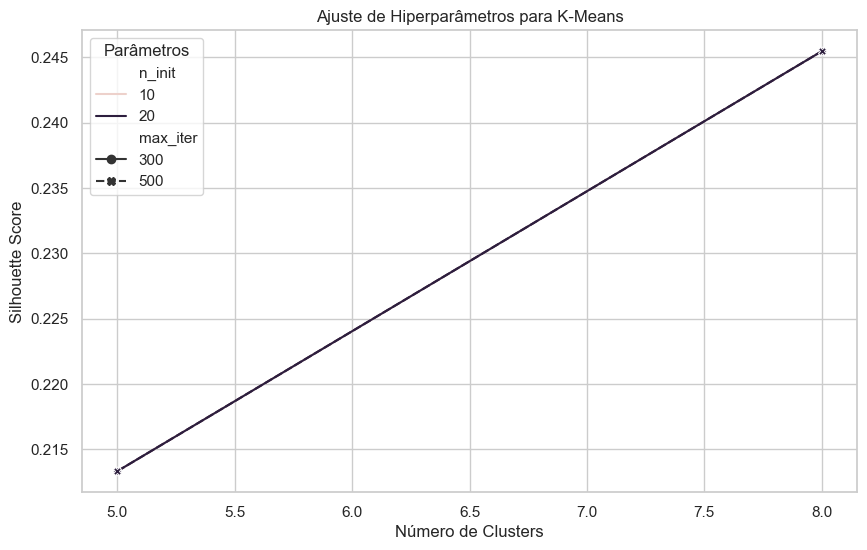

In [26]:
# Bibliotecas necessárias
from sklearn.metrics import silhouette_score
import numpy as np

# Intervalos de hiperparâmetros para testar
parametros = {
    'n_clusters': [5, 8],  # Número de clusters, baseado na análise anterior
    'init': ['k-means++', 'random'],  # Inicialização dos centroides
    'n_init': [10, 20],  # Número de inicializações diferentes
    'max_iter': [300, 500],  # Número máximo de iterações
    'tol': [1e-4, 1e-3],  # Tolerância para convergência
}

# DataFrame para armazenar os resultados
resultados = []

# Testando combinações de hiperparâmetros
for k in parametros['n_clusters']:
    for n_init in parametros['n_init']:
        for max_iter in parametros['max_iter']:
            # Configurando o modelo K-Means
            kmeans = KMeans(
                n_clusters=k,
                init='k-means++',
                n_init=n_init,
                max_iter=max_iter,
                random_state=42
            )
            # Ajustando o modelo e calculando a métrica
            clusters = kmeans.fit_predict(df_normalizado)
            silhouette_avg = silhouette_score(df_normalizado, clusters)

            # Armazenando os resultados
            resultados.append({
                'n_clusters': k,
                'n_init': n_init,
                'max_iter': max_iter,
                'silhouette_score': silhouette_avg
            })

# Convertendo os resultados para um DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenando os resultados pelo melhor Silhouette Score
melhores_resultados = resultados_df.sort_values(by='silhouette_score', ascending=False)

# Exibindo os 5 melhores resultados
print("Top 5 Configurações:")
print(melhores_resultados.head())

# Visualizando os resultados
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=melhores_resultados,
    x='n_clusters',
    y='silhouette_score',
    hue='n_init',
    style='max_iter',
    markers=True
)
plt.title("Ajuste de Hiperparâmetros para K-Means")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.legend(title="Parâmetros")
plt.show()

Top 5 Configurações:
    n_clusters  silhouette_score  davies_bouldin  calinski_harabasz
16           8          0.245466        1.303068        1513.828440
18           8          0.245466        1.303068        1513.828440
22           8          0.245466        1.303068        1513.828440
20           8          0.245466        1.303068        1513.828440
29           8          0.245460        1.303110        1513.819135


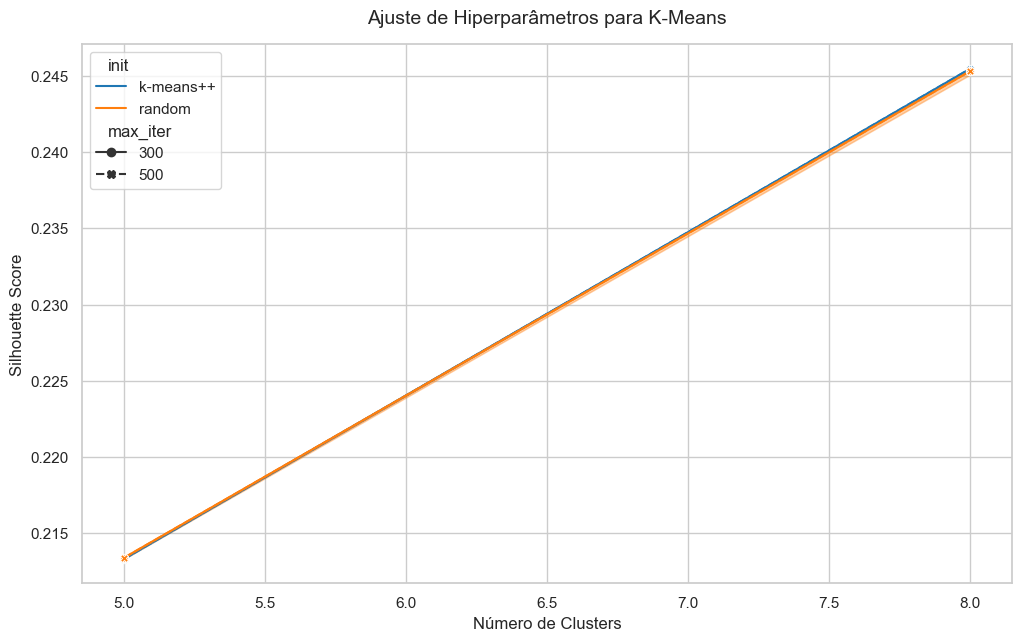

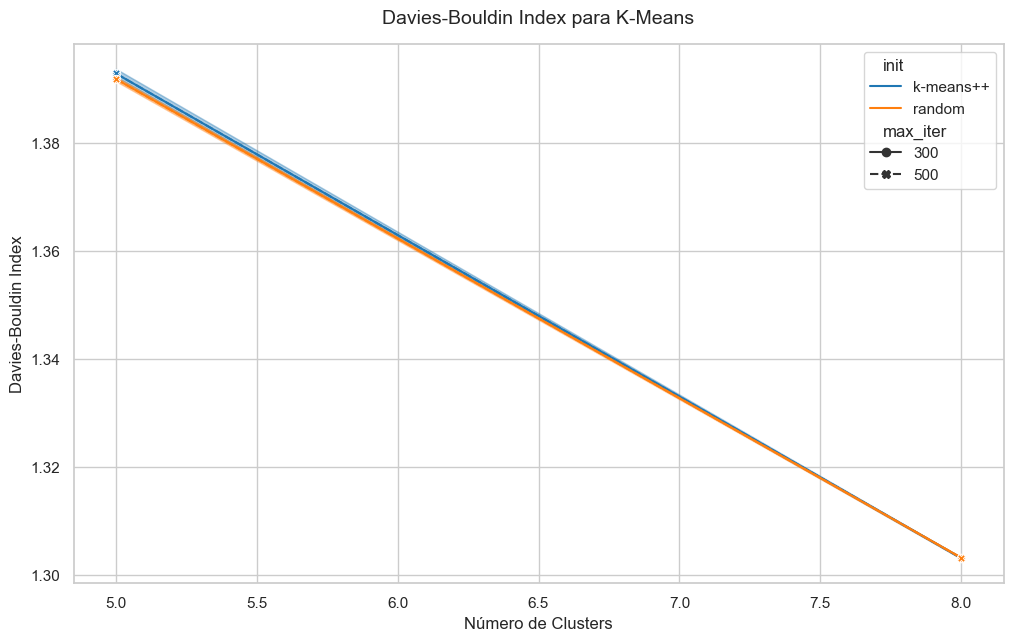

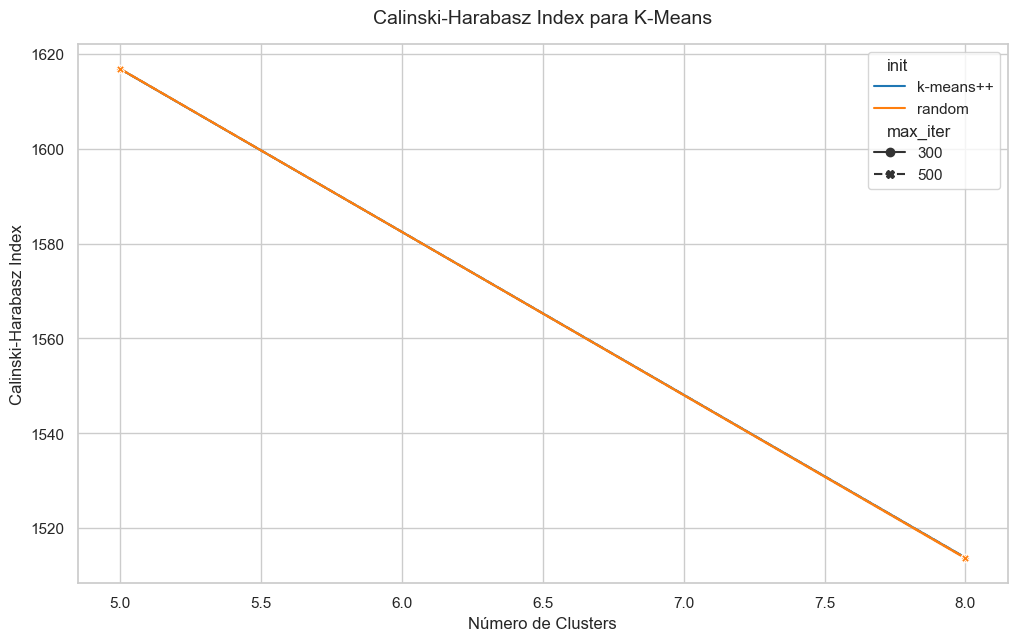

In [28]:
# Bibliotecas adicionais para métricas
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Lista para armazenar os resultados
resultados = []

# Testando diferentes combinações de hiperparâmetros
for k in parametros['n_clusters']:
    for init in parametros['init']:
        for n_init in parametros['n_init']:
            for max_iter in parametros['max_iter']:
                for tol in parametros['tol']:
                    # Configurando o modelo K-Means
                    kmeans = KMeans(
                        n_clusters=k,
                        init=init,
                        n_init=n_init,
                        max_iter=max_iter,
                        tol=tol,
                        random_state=42
                    )
                    # Ajustando o modelo e calculando métricas
                    clusters = kmeans.fit_predict(df_normalizado)
                    silhouette_avg = silhouette_score(df_normalizado, clusters)
                    davies_bouldin = davies_bouldin_score(df_normalizado, clusters)
                    calinski_harabasz = calinski_harabasz_score(df_normalizado, clusters)

                    # Armazenando os resultados
                    resultados.append({
                        'n_clusters': k,
                        'init': init,
                        'n_init': n_init,
                        'max_iter': max_iter,
                        'tol': tol,
                        'silhouette_score': silhouette_avg,
                        'davies_bouldin': davies_bouldin,
                        'calinski_harabasz': calinski_harabasz
                    })

# Convertendo os resultados para um DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenando por Silhouette Score
melhores_resultados = resultados_df.sort_values(by='silhouette_score', ascending=False)

# Exibindo os 5 melhores resultados
print("Top 5 Configurações:")
print(melhores_resultados[['n_clusters', 'silhouette_score', 'davies_bouldin', 'calinski_harabasz']].head())

# Visualização dos resultados (Silhouette Score)
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=melhores_resultados,
    x='n_clusters',
    y='silhouette_score',
    hue='init',
    style='max_iter',
    markers=True,
    palette="tab10"
)
plt.title("Ajuste de Hiperparâmetros para K-Means", fontsize=14, pad=15)
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(True)
plt.show()

# Visualização adicional para Davies-Bouldin Index e Calinski-Harabasz Index
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=melhores_resultados,
    x='n_clusters',
    y='davies_bouldin',
    hue='init',
    style='max_iter',
    markers=True,
    palette="tab10"
)
plt.title("Davies-Bouldin Index para K-Means", fontsize=14, pad=15)
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Davies-Bouldin Index", fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=melhores_resultados,
    x='n_clusters',
    y='calinski_harabasz',
    hue='init',
    style='max_iter',
    markers=True,
    palette="tab10"
)
plt.title("Calinski-Harabasz Index para K-Means", fontsize=14, pad=15)
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Calinski-Harabasz Index", fontsize=12)
plt.grid(True)
plt.show()